In [4]:
%reload_ext autoreload
%autoreload 2
%reload_ext ipy_dict_hierarchy
%reload_ext watermark

import os
import pymc as pm
import nutpie
import numpy as np
import pandas as pd
import arviz as az
import sys
import matplotlib.pyplot as plt
from itertools import product
from tqdm.notebook import tqdm
from arviz.plots.backends.matplotlib import matplotlib_kwarg_dealiaser


import logging

logging.basicConfig(
    format="%(asctime)s | %(levelname)-8s | %(name)-s | %(funcName)-s | %(message)s",
    level=logging.WARNING,
)
log = logging.getLogger("notebook")
log.setLevel("DEBUG")

extra_path = os.path.abspath("../")
sys.path.append(extra_path)
log.info(f"project directory: {extra_path}")

from ana import utility as utl
from ana import plot_helper as ph
from ana import bayesian_models as bm

ph.log.setLevel("DEBUG")
utl.log.setLevel("DEBUG")

data_dir = os.path.abspath("/path/to/repo/experiment_analysis/dat/")
data_dir = os.path.abspath("../../../paper_code/experiment_analysis/data/")


2024-07-12 10:33:51,896 | INFO     | notebook | <module> | project directory: /data.nst/lucas/projects/mouse_visual_timescales_predictability/paper_code_repo/experiment_analysis


In [5]:
# Load plotting settings
plot_settings = {}

plot_settings["imgdir"] = "../img"
plot_settings["img_format"] = "pdf"
plot_settings["textwidth"] = 5.787402103
plot_settings["panel_width"] = 0.37 * plot_settings["textwidth"]
plot_settings["panel_height"] = 2.9
plot_settings["panel_size"] = (
    plot_settings["panel_width"],
    plot_settings["panel_height"],
)
plot_settings["rcparams"] = {
    "axes.labelsize": 11,
    "font.size": 11,
    # "font.family": "serif",
    # "font.serif": "Computer Modern Roman",
    "legend.fontsize": 9,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    # transparent figure bg
    "savefig.facecolor" : (0.0, 0.0, 0.0, 0.0),
    "axes.facecolor" : (1.0, 0.0, 0.0, 0.0),
    # 'text.usetex': True,
        # 'figure.figsize': [4.6299216824, 3]  # 0.8 * width
    "figure.figsize": [plot_settings["panel_width"], plot_settings["panel_height"]],}
plt.rcParams.update(plot_settings["rcparams"])

  0%|          | 0/9 [00:00<?, ?it/s]

tau_double natural_movie_three
median:  2.2532017401070226
median:  0.49904191540089327


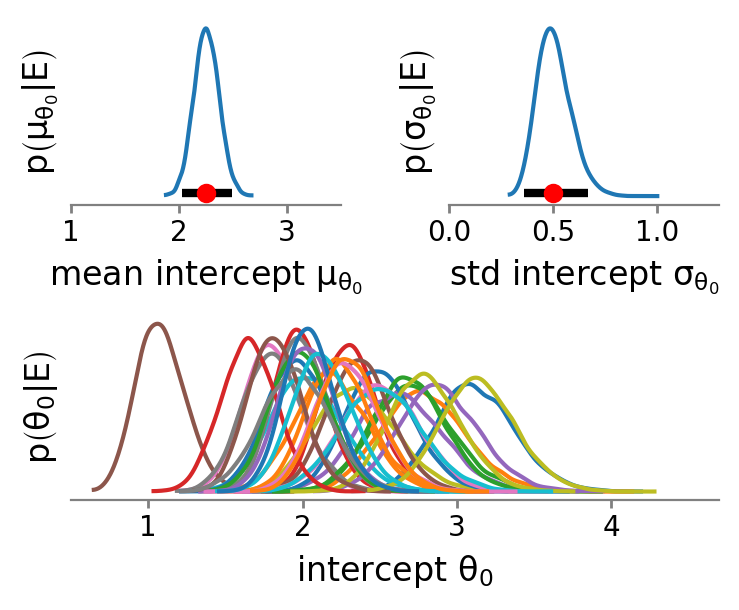

tau_double spontaneous
median:  2.5416848316590785
median:  0.6865179089006886


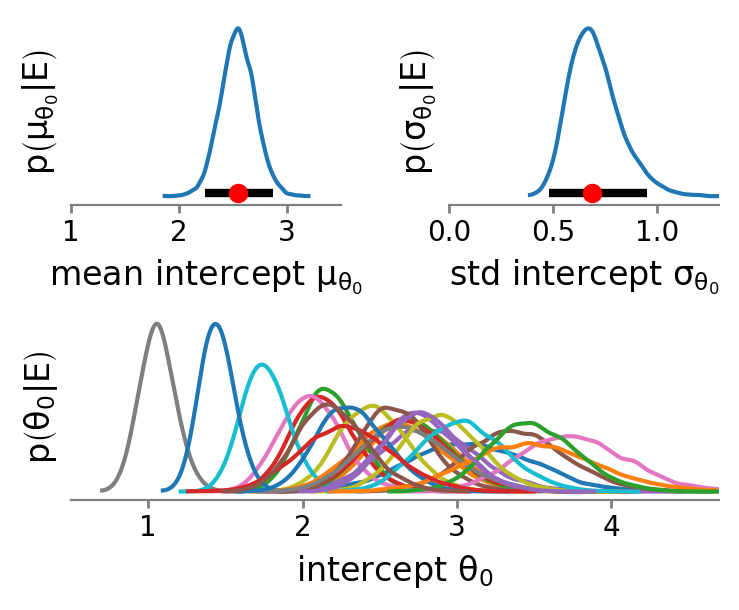

tau_double natural_movie_one_more_repeats
median:  2.129589563693819
median:  0.43511574249736845


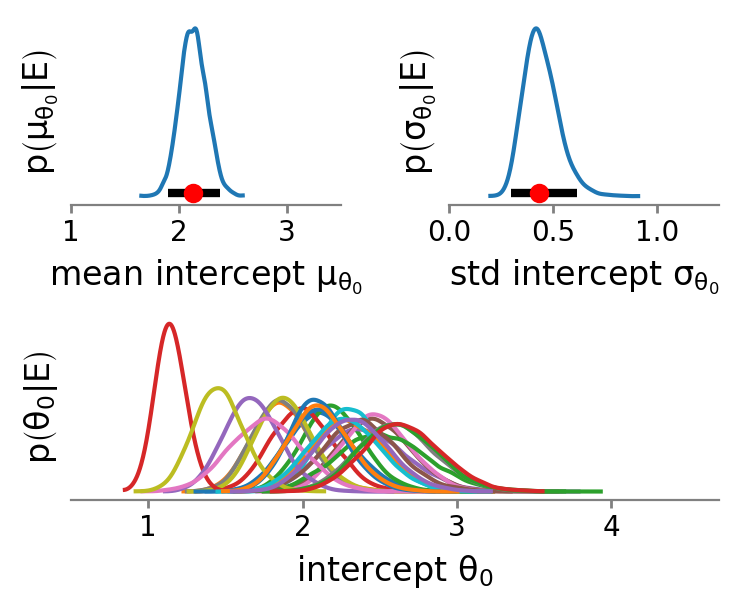

tau_R natural_movie_three
median:  2.6069733505541235
median:  0.4481073336017647


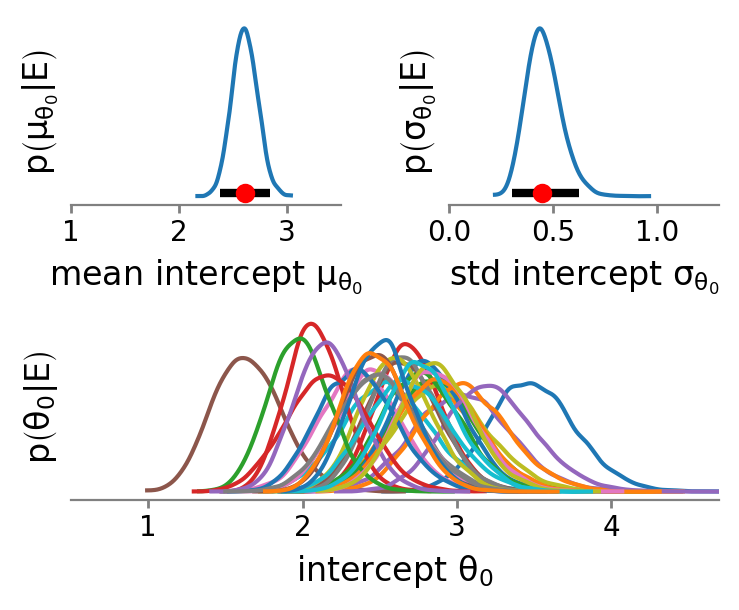

tau_R spontaneous
median:  2.879304191896112
median:  0.5766203615892018


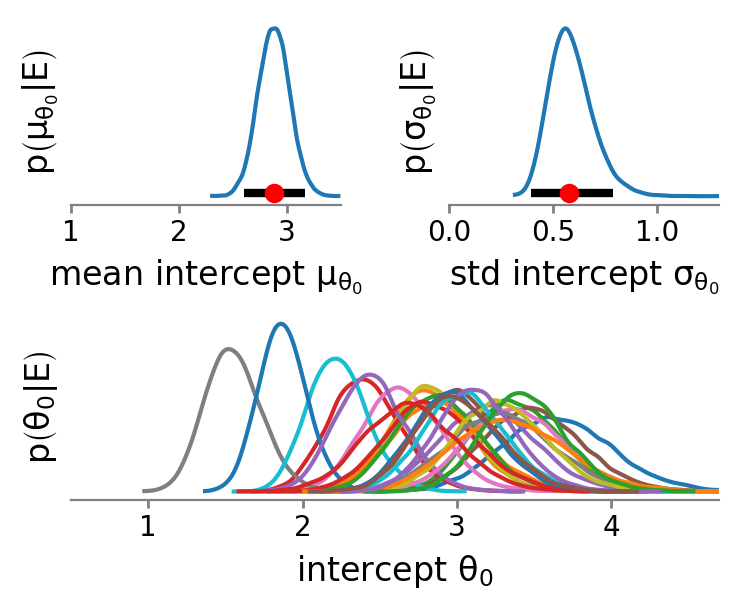

tau_R natural_movie_one_more_repeats
median:  2.4380564225213464
median:  0.4076174280558943


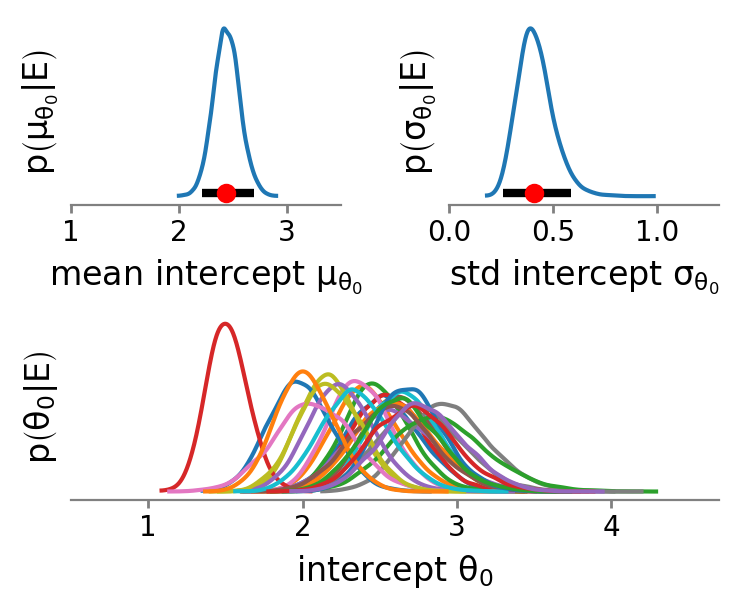

R_tot natural_movie_three
median:  1.0532659660474368
median:  0.20315862481991087


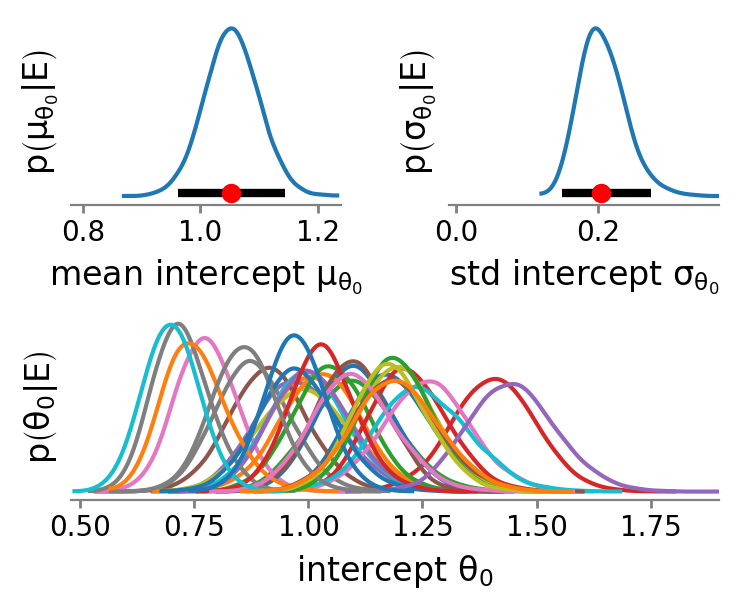

R_tot spontaneous
median:  1.063899273647455
median:  0.0783597877681507


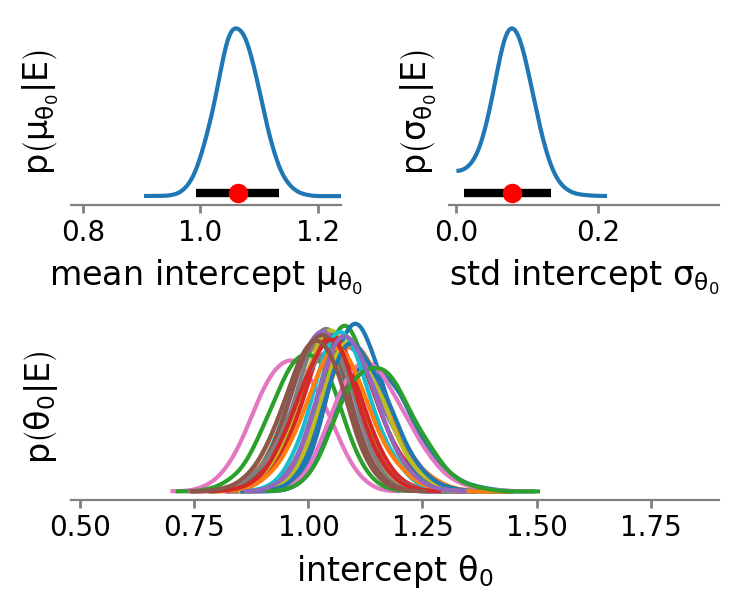

R_tot natural_movie_one_more_repeats
median:  1.0749417042133784
median:  0.16210157643364587


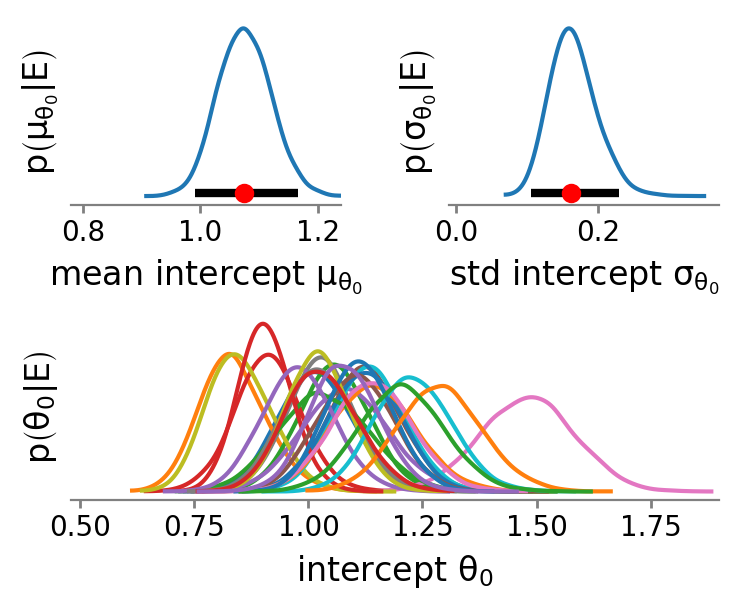

In [15]:
# posterior visualization (hierarchical parameters) for hierarchy score model

model = "lmm"
measures = ["tau_double", "tau_R", "R_tot"]
stimuli = ["natural_movie_three", "spontaneous", "natural_movie_one_more_repeats"]

combinations = list(product(measures, stimuli))
loos = dict()
rc_kwargs = {
    "xtick.labelsize" : 10,
    "ytick.labelsize" : 10,
    "axes.titlesize" : 12,
    "axes.labelsize" : 12,
    "font.size" : 10,
}

with plt.rc_context(rc_kwargs):
    # Plot hierarchy score posteriors for different measures and stimuli
    for meas, stim in tqdm(combinations):
        print(meas, stim)
        idata = az.from_netcdf(f"{data_dir}/bayes_cortex_{model}_{meas}_{stim}.nc")

        # # slope

        fig = plt.figure(figsize=(plot_settings["panel_width"] * 1.7, 3))
        # fig.suptitle(measure_name, ha = "center")
        # fig.suptitle("hierarchy score slope", ha = "center")

        ax1 = plt.subplot(2, 2, 1)
        ax2 = plt.subplot(2, 2, 2)
        ax3 = plt.subplot(2, 1, 2)
        fig.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1, hspace=0.6, wspace=0.4)
        # if args.measure == "tau_C":
        #     ax1.set_xlim([-0.05,0.22])
        #     ax3.set_xlim([-0.24,0.44])
        # if args.measure == "tau_R":
        #     ax1.set_xlim([-0.02,0.14])
        #     ax3.set_xlim([-0.12,0.27])
        # if args.measure == "R_tot":
        #     ax1.set_xlim([-0.18,0.06])
        #     ax3.set_xlim([-0.31,0.21])
        if meas == "R_tot":
            bw = 0.01
        else:
            bw = 0.05
        ph.plot_posterior(
            idata,
            ax=ax1,
            var_names = ["mu_slope"],
            point_estimate="median",
            hdi_prob=0.95,
            bw=bw,
        )
        ax1.set_xlabel(r"mean slope $\mu_{\theta_{\mathrm{hs}}}$")
        ax1.set_ylabel(r"$p\left(\mu_{\theta_{\mathrm{hs}}} | E\right)$")
        ph.plot_posterior(
            idata,
            ax=ax2,
            var_names=["sigma_slope"],
            point_estimate="median",
            hdi_prob=0.95,
            bw=bw,
        )
        ax2.set_xlabel(r"std slope $\sigma_{\theta_{\mathrm{hs}}}$")
        ax2.set_ylabel(r"$p\left(\sigma_{\theta_{\mathrm{hs}}} | E\right)$")

        ph.plot_posterior(
            idata,
            ax=ax3,
            var_names=["session_slope"],
            hdi=False,
            bw=bw*2, # plotting session posteriors looks better with higher bandwidth
        )
        ax3.set_xlabel(r"hierarchy score slope $\theta_{\mathrm{hs}}$")
        ax3.set_ylabel(r"$p\left(\theta_{\mathrm{hs}} | E\right)$")

        ax1.axvline(x=0, ls="--", lw=2, color="0.0")
        ax3.axvline(x=0, ls="--", lw=2, color="0.0")

        if meas == "R_tot":
            ax1.set_xlim([-0.25,0.07]) # xrange for mean slope
            ax2.set_xlim([-0.02, 0.22]) # xrange for std slope
            ax3.set_xlim([-0.41, 0.31]) # xrange for session slope
        else: # ranges for timescale posteriors
            ax1.set_xlim([-0.1, 1.2]) # xrange for mean slope
            ax2.set_xlim([-0.1, 1.2]) # xrange for std slope
            ax3.set_xlim([-2.7, 2.7]) # xrange for session slope

        # for ax in [ax1, ax2, ax3]:
        #     utl.make_plot_pretty(ax)
        plt.show()
        fig.savefig(f"../img/bayes_cortex_{model}_hierarchy_slope_posterior_{meas}_{stim}.pdf", bbox_inches="tight", dpi=300)

        # # intercept

        fig = plt.figure(figsize=(plot_settings["panel_width"] * 1.7, 3))
        # fig.suptitle(measure_name, ha = "center")
        # fig.suptitle("hierarchy score slope", ha = "center")

        ax1 = plt.subplot(2, 2, 1)
        ax2 = plt.subplot(2, 2, 2)
        ax3 = plt.subplot(2, 1, 2)
        fig.subplots_adjust(
            left=0.01, right=0.9, top=0.9, bottom=0.1, hspace=0.6, wspace=0.4
        )
        # if args.measure == "tau_C":
        #     ax1.set_xlim([-0.05,0.22])
        #     ax3.set_xlim([-0.24,0.44])
        # if args.measure == "tau_R":
        #     ax1.set_xlim([-0.02,0.14])
        #     ax3.set_xlim([-0.12,0.27])
        # if args.measure == "R_tot":
        #     ax1.set_xlim([-0.18,0.06])
        #     ax3.set_xlim([-0.31,0.21])
        if meas == "R_tot":
            bw = 0.01
        else:
            bw = 0.02
        ph.plot_posterior(
            idata,
            ax=ax1,
            var_names=["mu_intercept"],
            point_estimate="median",
            hdi_prob=0.95,
            bw=bw,
        )
        ax1.set_xlabel(r"mean intercept $\mu_{\theta_0}$")
        ax1.set_ylabel(r"$p\left(\mu_{\theta_0} | E\right)$")
        ph.plot_posterior(
            idata,
            ax=ax2,
            var_names=["sigma_intercept"],
            point_estimate="median",
            hdi_prob=0.95,
            bw=bw,
        )
        ax2.set_xlabel(r"std intercept $\sigma_{\theta_0}$")
        ax2.set_ylabel(r"$p\left(\sigma_{\theta_0} | E\right)$")

        ph.plot_posterior(
            idata,
            ax=ax3,
            var_names=["session_intercept"],
            hdi=False,
            bw=bw * 2,  # plotting session posteriors looks better with higher bandwidth
        )
        ax3.set_xlabel(r"intercept $\theta_{0}$")
        ax3.set_ylabel(r"$p\left(\theta_{0} | E\right)$")

        # fix ranges
        if meas == "R_tot":
            ax1.set_xlim([0.78, 1.24])  # xrange for mean slope
            ax2.set_xlim([-0.01, 0.37])  # xrange for std slope
            ax3.set_xlim([0.48, 1.9])  # xrange for session slope
        else:  # ranges for timescale posteriors
            ax1.set_xlim([1.0, 3.5])  # xrange for mean slope
            ax2.set_xlim([0, 1.3])  # xrange for std slope
            ax3.set_xlim([0.5, 4.7])  # xrange for session slope

        # for ax in [ax1, ax2, ax3]:
        #     utl.make_plot_pretty(ax)
        plt.show()
        fig.savefig(
            f"../img/bayes_cortex_{model}_intercept_posterior_{meas}_{stim}.pdf",
            bbox_inches="tight",
            dpi=300,
        )



  0%|          | 0/9 [00:00<?, ?it/s]

tau_double natural_movie_three
median:  0.4853448957764105
median:  0.4008268324622386


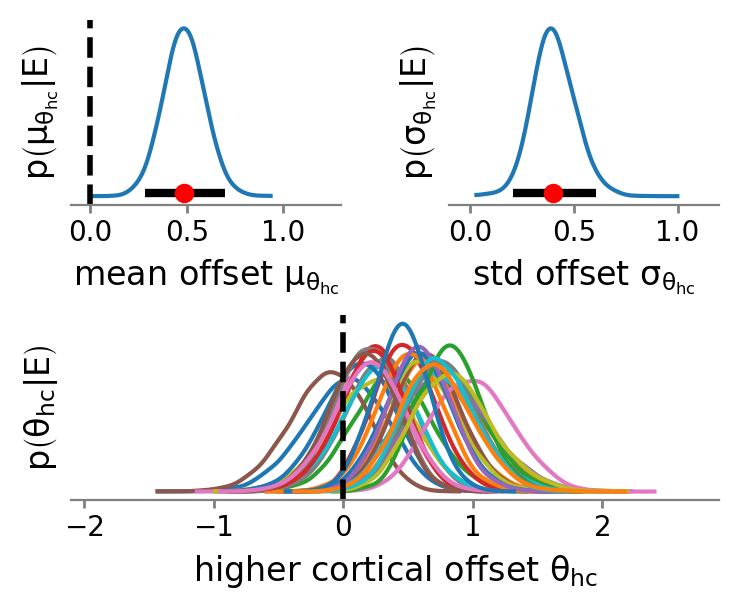

median:  2.3053189872388318
median:  0.4244986806361357


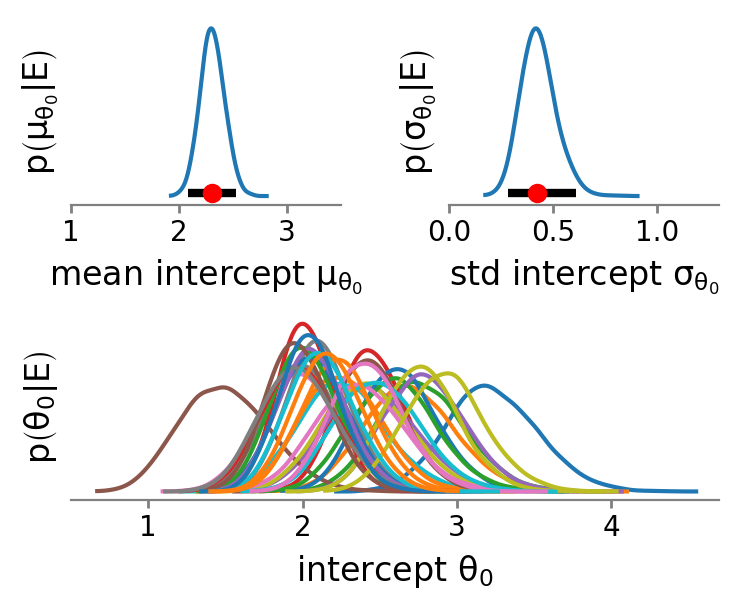

tau_double spontaneous
median:  0.4477852583672811
median:  0.5563118936136658


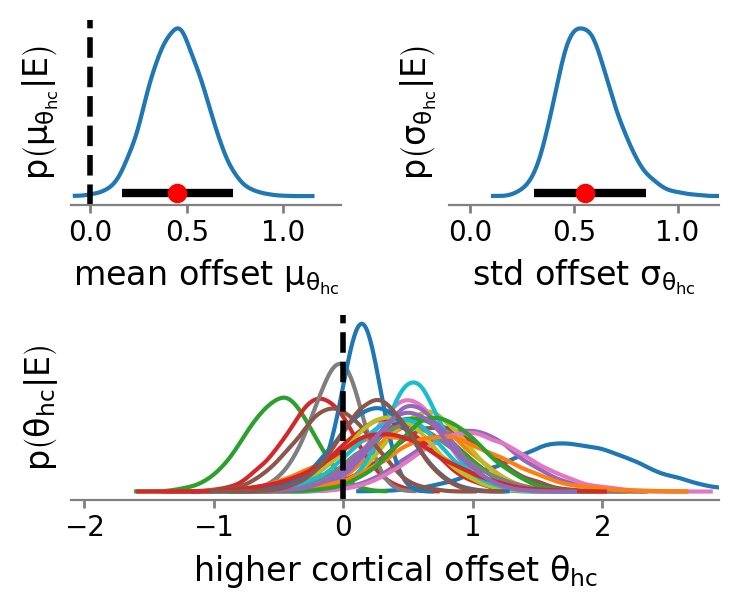

median:  2.5996932672833744
median:  0.6697864641277199


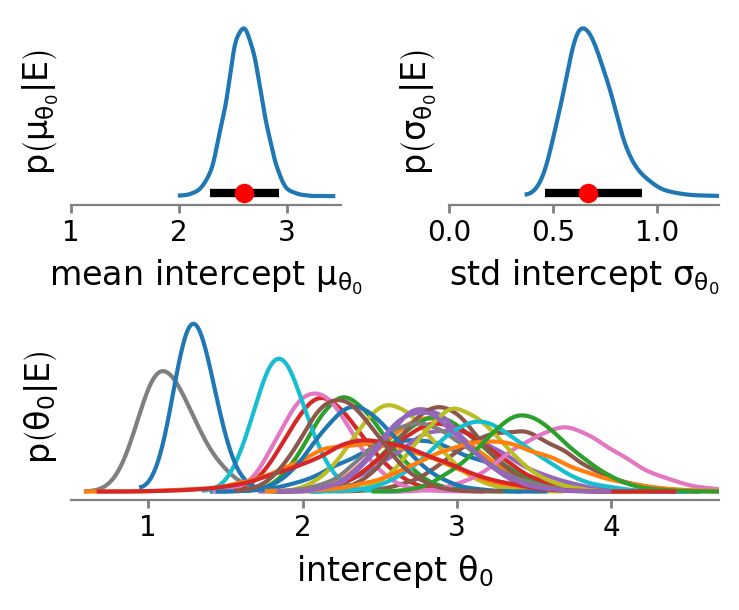

tau_double natural_movie_one_more_repeats
median:  0.40588287861945715
median:  0.363394468112305


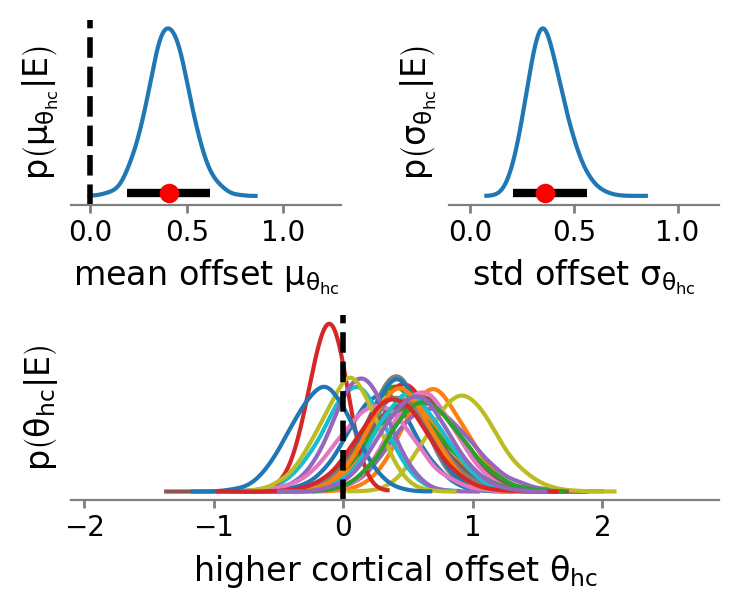

median:  2.1974929528459755
median:  0.40047279003953473


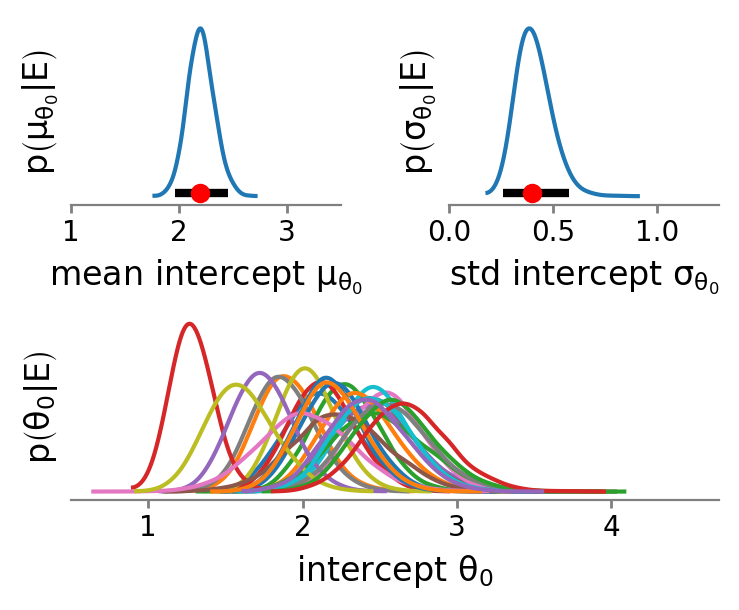

tau_R natural_movie_three
median:  0.5892261678205603
median:  0.5139234965794197


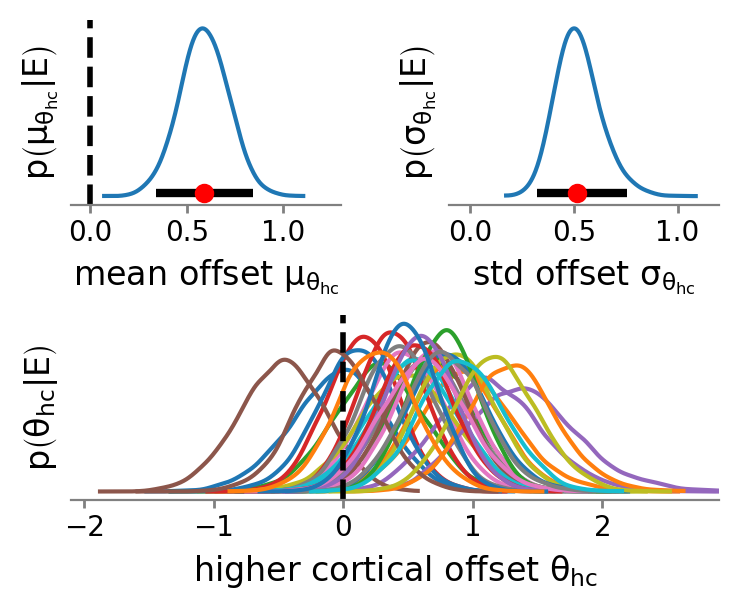

median:  2.653593915912636
median:  0.3648132352082697


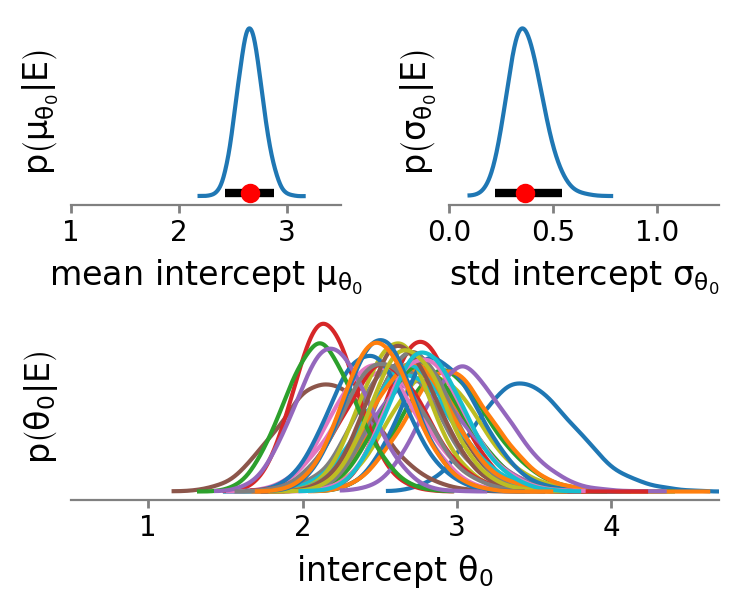

tau_R spontaneous
median:  0.31288360614182253
median:  0.46959158724069094


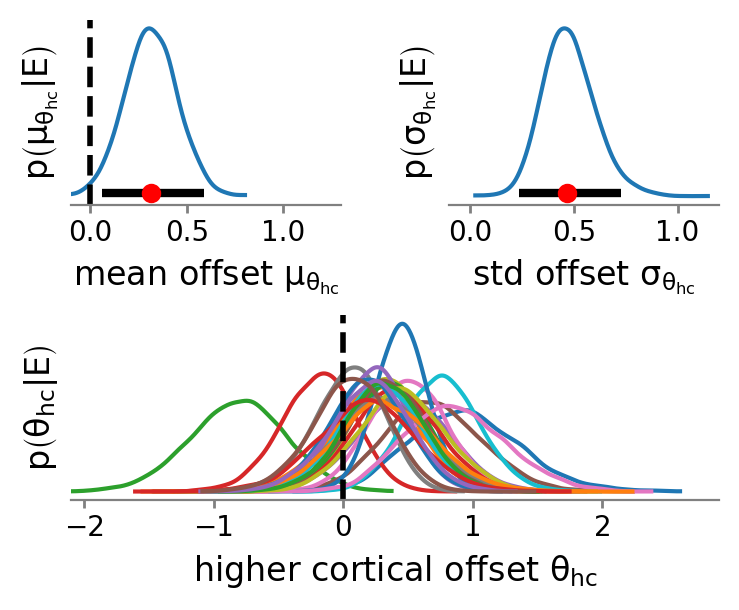

median:  2.967865450288408
median:  0.5716881767368228


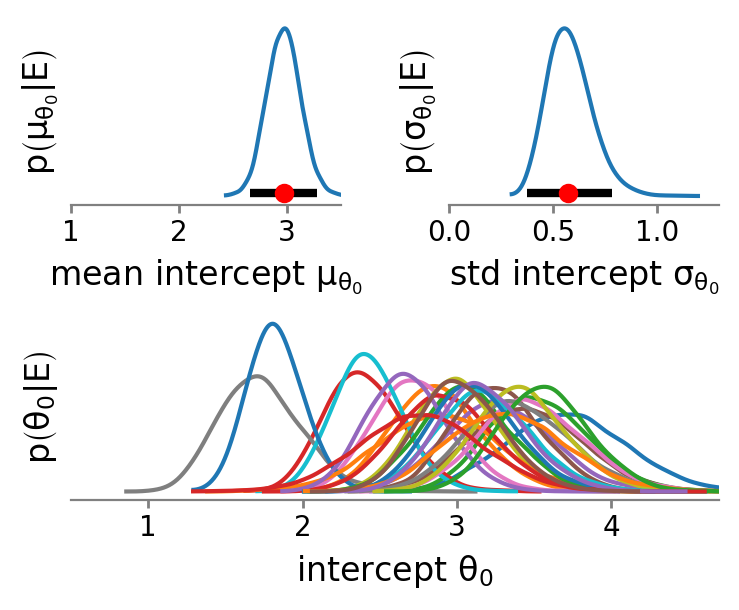

tau_R natural_movie_one_more_repeats
median:  0.7134478335748093
median:  0.5067535765098261


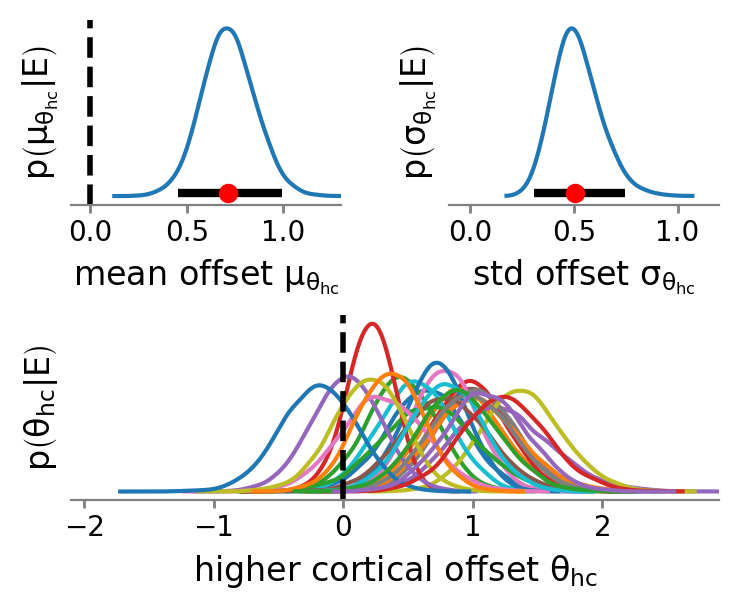

median:  2.4084858242988543
median:  0.35448826003657485


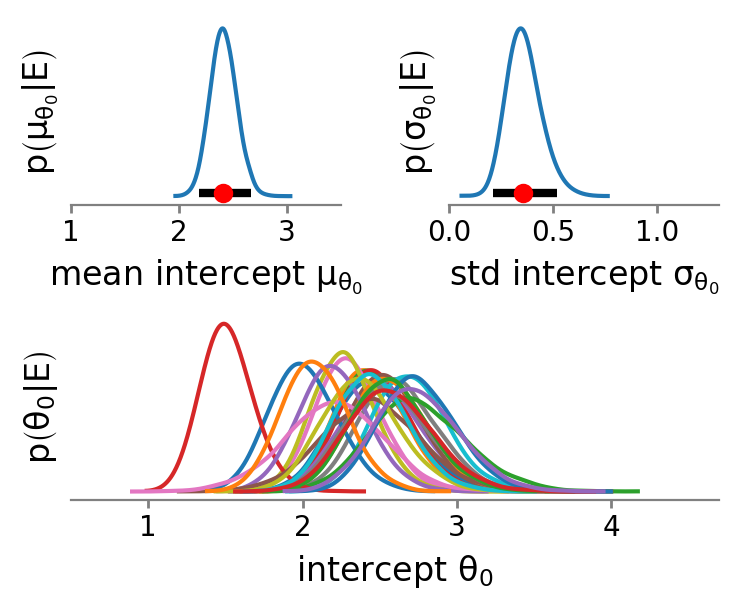

R_tot natural_movie_three
median:  -0.14406451143627894
median:  0.048041194884895


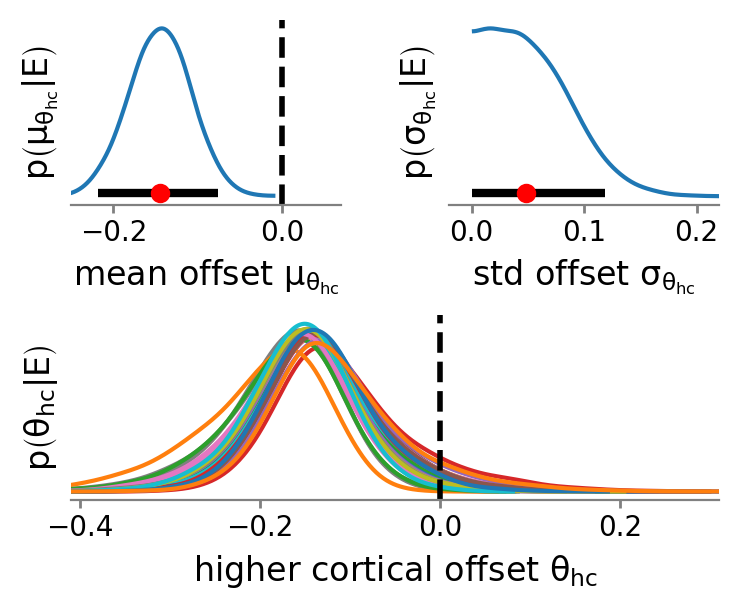

median:  1.102983033498227
median:  0.1981673454348682


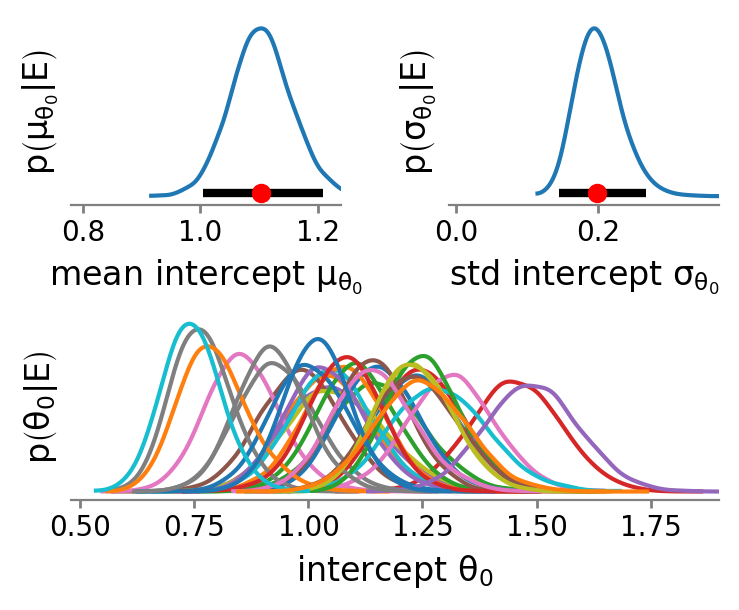

R_tot spontaneous
median:  -0.05702371525075445
median:  0.06765463123086313


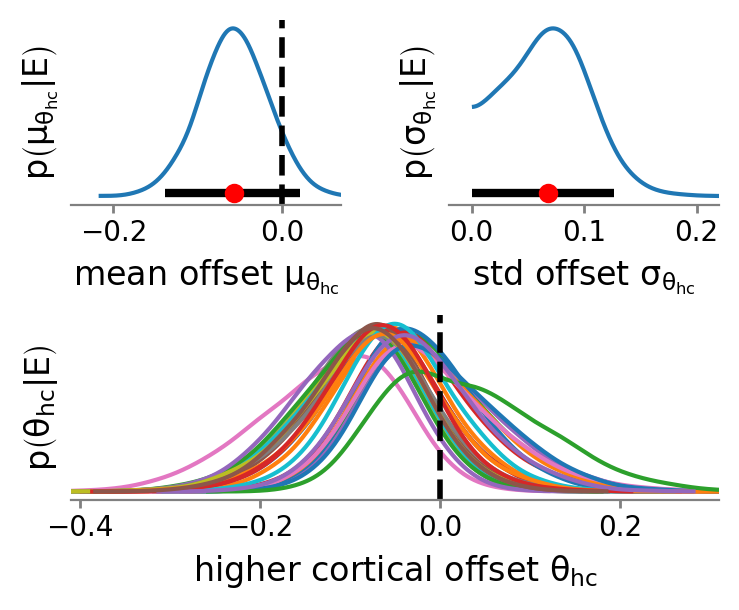

median:  1.071524576513165
median:  0.07005235833259275


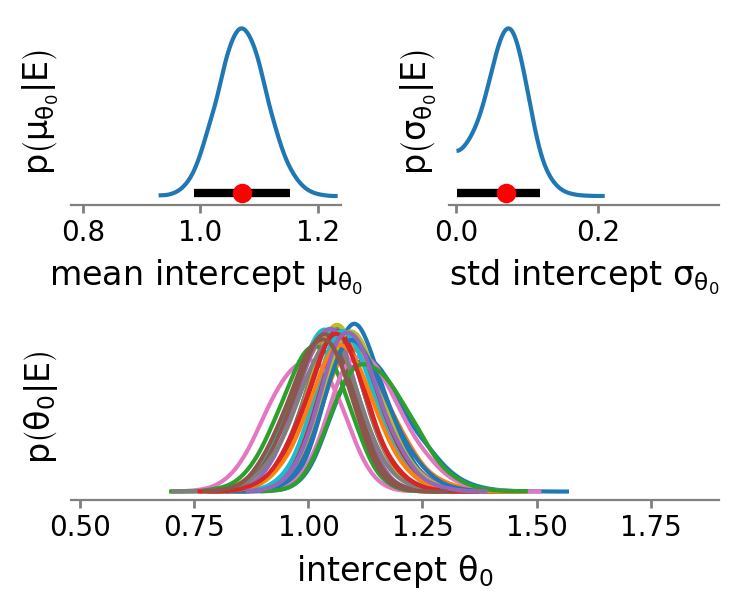

R_tot natural_movie_one_more_repeats
median:  -0.12709989123564483
median:  0.06503562289318088


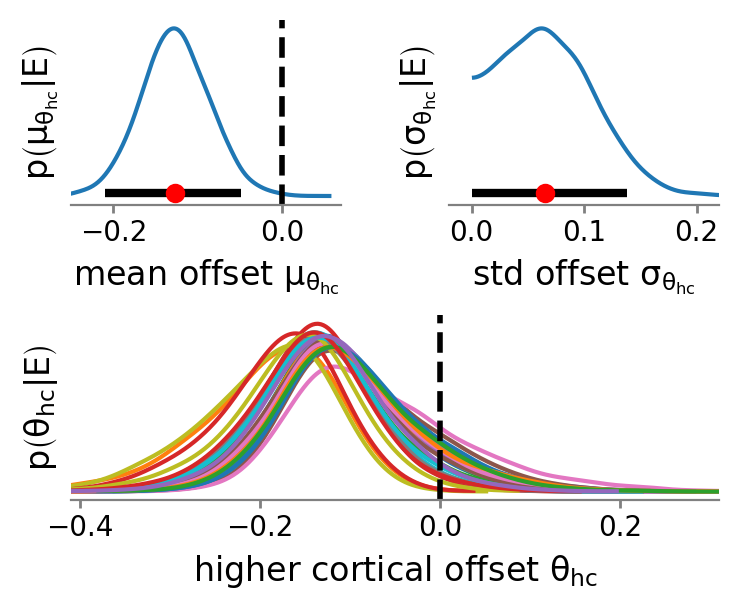

median:  1.0923767593311524
median:  0.1597046061125083


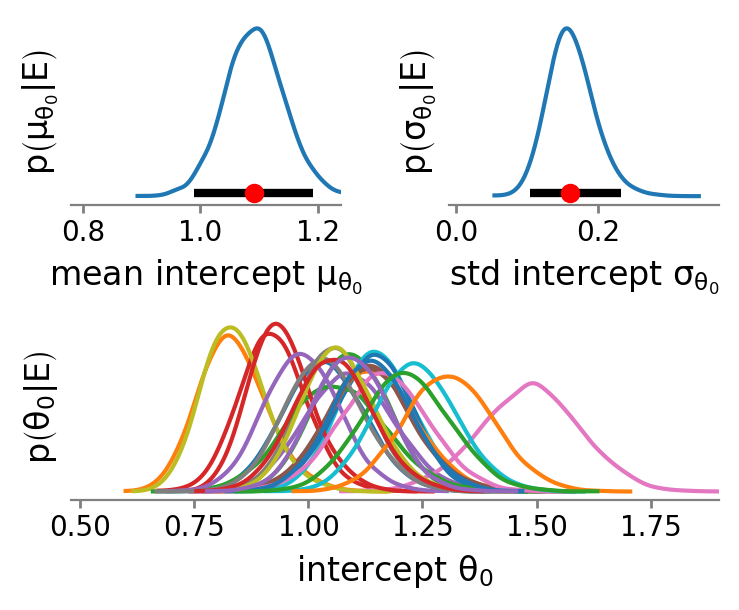

In [19]:
# posterior visualization (hierarchical parameters) for structure group model

model = "sgm"
measures = ["tau_double", "tau_R", "R_tot"]
stimuli = ["natural_movie_three", "spontaneous", "natural_movie_one_more_repeats"]

combinations = list(product(measures, stimuli))
loos = dict()
rc_kwargs = {
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.titlesize": 12,
    "axes.labelsize": 12,
    "font.size": 10,
}

with plt.rc_context(rc_kwargs):
    # Plot hierarchy score posteriors for different measures and stimuli
    for meas, stim in tqdm(combinations):
        print(meas, stim)
        idata = az.from_netcdf(f"{data_dir}/bayes_cortex_{model}_{meas}_{stim}.nc")

        # # slope

        fig = plt.figure(figsize=(plot_settings["panel_width"] * 1.7, 3))
        # fig.suptitle(measure_name, ha = "center")
        # fig.suptitle("hierarchy score slope", ha = "center")

        ax1 = plt.subplot(2, 2, 1)
        ax2 = plt.subplot(2, 2, 2)
        ax3 = plt.subplot(2, 1, 2)
        fig.subplots_adjust(
            left=0.01, right=0.9, top=0.9, bottom=0.1, hspace=0.6, wspace=0.4
        )
        # if args.measure == "tau_C":
        #     ax1.set_xlim([-0.05,0.22])
        #     ax3.set_xlim([-0.24,0.44])
        # if args.measure == "tau_R":
        #     ax1.set_xlim([-0.02,0.14])
        #     ax3.set_xlim([-0.12,0.27])
        # if args.measure == "R_tot":
        #     ax1.set_xlim([-0.18,0.06])
        #     ax3.set_xlim([-0.31,0.21])
        if meas == "R_tot":
            bw = 0.01
        else:
            bw = 0.03
        ph.plot_posterior(
            idata,
            ax=ax1,
            var_names=["mu_hc_offset"],
            point_estimate="median",
            hdi_prob=0.95,
            bw=bw,
        )
        ax1.set_xlabel(r"mean offset $\mu_{\theta_{\mathrm{hc}}}$")
        ax1.set_ylabel(r"$p\left(\mu_{\theta_{\mathrm{hc}}} | E\right)$")
        ph.plot_posterior(
            idata,
            ax=ax2,
            var_names=["sigma_hc_offset"],
            point_estimate="median",
            hdi_prob=0.95,
            bw=bw,
        )
        ax2.set_xlabel(r"std offset $\sigma_{\theta_{\mathrm{hc}}}$")
        ax2.set_ylabel(r"$p\left(\sigma_{\theta_{\mathrm{hc}}} | E\right)$")

        ph.plot_posterior(
            idata,
            ax=ax3,
            var_names=["session_hc_offset"],
            hdi=False,
            bw=bw * 2,  # plotting session posteriors looks better with higher bandwidth
        )
        ax3.set_xlabel(r"higher cortical offset $\theta_{\mathrm{hc}}$")
        ax3.set_ylabel(r"$p\left(\theta_{\mathrm{hc}} | E\right)$")

        ax1.axvline(x=0, ls="--", lw=2, color="0.0")
        ax3.axvline(x=0, ls="--", lw=2, color="0.0")

        if meas == "R_tot":
            ax1.set_xlim([-0.25, 0.07])  # xrange for mean slope
            ax2.set_xlim([-0.02, 0.22])  # xrange for std slope
            ax3.set_xlim([-0.41, 0.31])  # xrange for session slope
        else:  # ranges for timescale posteriors
            ax1.set_xlim([-0.1, 1.3])  # xrange for mean slope
            ax2.set_xlim([-0.1, 1.2])  # xrange for std slope
            ax3.set_xlim([-2.1, 2.9])  # xrange for session slope

        # for ax in [ax1, ax2, ax3]:
        #     utl.make_plot_pretty(ax)
        plt.show()
        fig.savefig(
            f"../img/bayes_cortex_{model}_hc_offset_posterior_{meas}_{stim}.pdf",
            bbox_inches="tight",
            dpi=300,
        )

        # # intercept

        fig = plt.figure(figsize=(plot_settings["panel_width"] * 1.7, 3))
        # fig.suptitle(measure_name, ha = "center")
        # fig.suptitle("hierarchy score slope", ha = "center")

        ax1 = plt.subplot(2, 2, 1)
        ax2 = plt.subplot(2, 2, 2)
        ax3 = plt.subplot(2, 1, 2)
        fig.subplots_adjust(
            left=0.01, right=0.9, top=0.9, bottom=0.1, hspace=0.6, wspace=0.4
        )
        # if args.measure == "tau_C":
        #     ax1.set_xlim([-0.05,0.22])
        #     ax3.set_xlim([-0.24,0.44])
        # if args.measure == "tau_R":
        #     ax1.set_xlim([-0.02,0.14])
        #     ax3.set_xlim([-0.12,0.27])
        # if args.measure == "R_tot":
        #     ax1.set_xlim([-0.18,0.06])
        #     ax3.set_xlim([-0.31,0.21])
        if meas == "R_tot":
            bw = 0.01
        else:
            bw = 0.03
        ph.plot_posterior(
            idata,
            ax=ax1,
            var_names=["mu_intercept"],
            point_estimate="median",
            hdi_prob=0.95,
            bw=bw,
        )
        ax1.set_xlabel(r"mean intercept $\mu_{\theta_0}$")
        ax1.set_ylabel(r"$p\left(\mu_{\theta_0} | E\right)$")
        ph.plot_posterior(
            idata,
            ax=ax2,
            var_names=["sigma_intercept"],
            point_estimate="median",
            hdi_prob=0.95,
            bw=bw,
        )
        ax2.set_xlabel(r"std intercept $\sigma_{\theta_0}$")
        ax2.set_ylabel(r"$p\left(\sigma_{\theta_0} | E\right)$")

        ph.plot_posterior(
            idata,
            ax=ax3,
            var_names=["session_intercept"],
            hdi=False,
            bw=bw * 2,  # plotting session posteriors looks better with higher bandwidth
        )
        ax3.set_xlabel(r"intercept $\theta_{0}$")
        ax3.set_ylabel(r"$p\left(\theta_{0} | E\right)$")

        # fix ranges
        if meas == "R_tot":
            ax1.set_xlim([0.78, 1.24])  # xrange for mean slope
            ax2.set_xlim([-0.01, 0.37])  # xrange for std slope
            ax3.set_xlim([0.48, 1.9])  # xrange for session slope
        else:  # ranges for timescale posteriors
            ax1.set_xlim([1.0, 3.5])  # xrange for mean slope
            ax2.set_xlim([0, 1.3])  # xrange for std slope
            ax3.set_xlim([0.5, 4.7])  # xrange for session slope

        # for ax in [ax1, ax2, ax3]:
        #     utl.make_plot_pretty(ax)
        plt.show()
        fig.savefig(
            f"../img/bayes_cortex_{model}_intercept_posterior_{meas}_{stim}.pdf",
            bbox_inches="tight",
            dpi=300,
        )

  0%|          | 0/9 [00:00<?, ?it/s]

tau_double natural_movie_three
b_os_rf $\mathrm{θ_{rf}}$ (responsiveness)
median:  -0.0871775557610877
b_log_fr $θ_{\log \nu}$ (log fir. rate)
median:  0.4940160357165064
epsilon ε (scale)
median:  1.3150546874256863
alpha $\alpha$ (shape)
median:  -1.9755682928780018


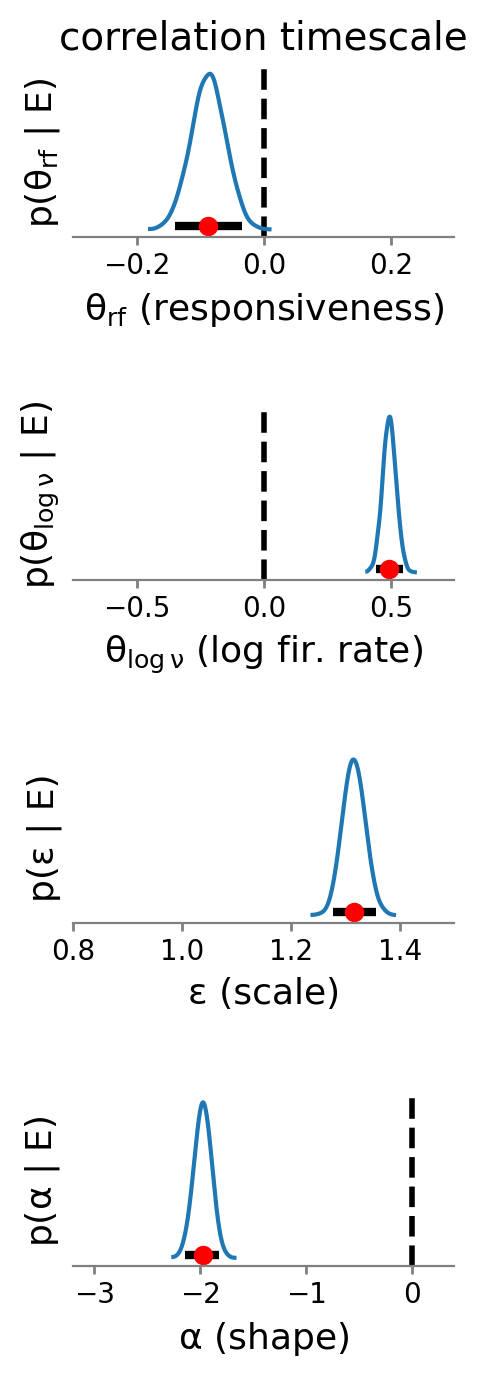

tau_double spontaneous
b_os_rf $\mathrm{θ_{rf}}$ (responsiveness)
median:  -0.18314370072421787
b_log_fr $θ_{\log \nu}$ (log fir. rate)
median:  0.35914955956582517
epsilon ε (scale)
median:  1.2809526236595925
alpha $\alpha$ (shape)
median:  -2.1866677761222277


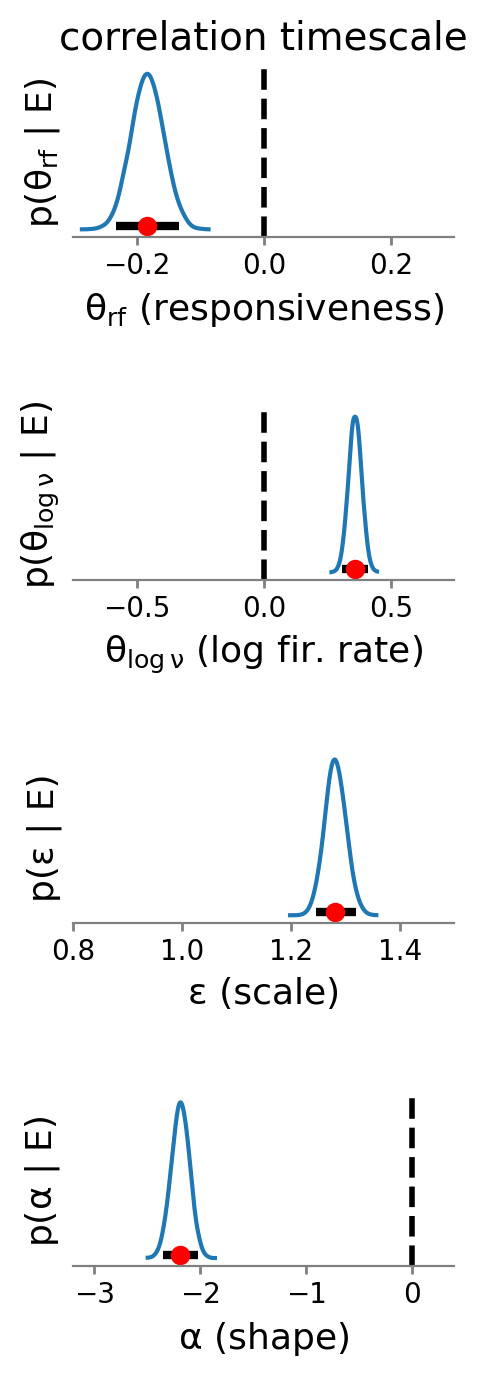

tau_double natural_movie_one_more_repeats
b_os_rf $\mathrm{θ_{rf}}$ (responsiveness)
median:  -0.1439664603339344
b_log_fr $θ_{\log \nu}$ (log fir. rate)
median:  0.4918205638172292
epsilon ε (scale)
median:  1.207852705642537
alpha $\alpha$ (shape)
median:  -1.434686884452337


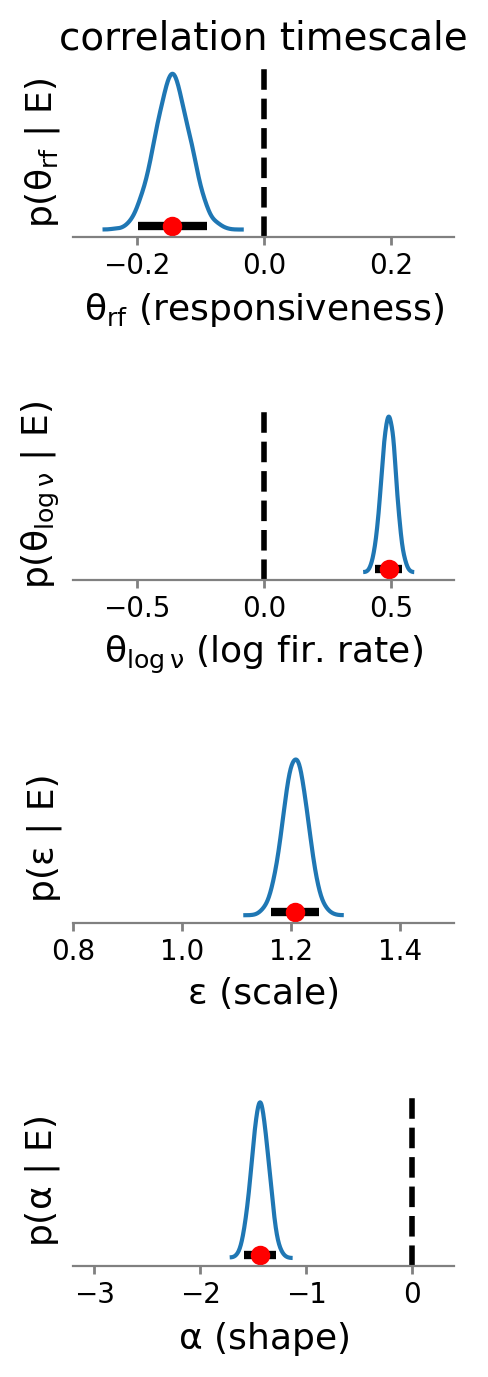

tau_R natural_movie_three
b_os_rf $\mathrm{θ_{rf}}$ (responsiveness)
median:  -0.12303164510536713
b_log_fr $θ_{\log \nu}$ (log fir. rate)
median:  -0.2842928528703288
epsilon ε (scale)
median:  1.4272130639085172
alpha $\alpha$ (shape)
median:  -2.583910223358692


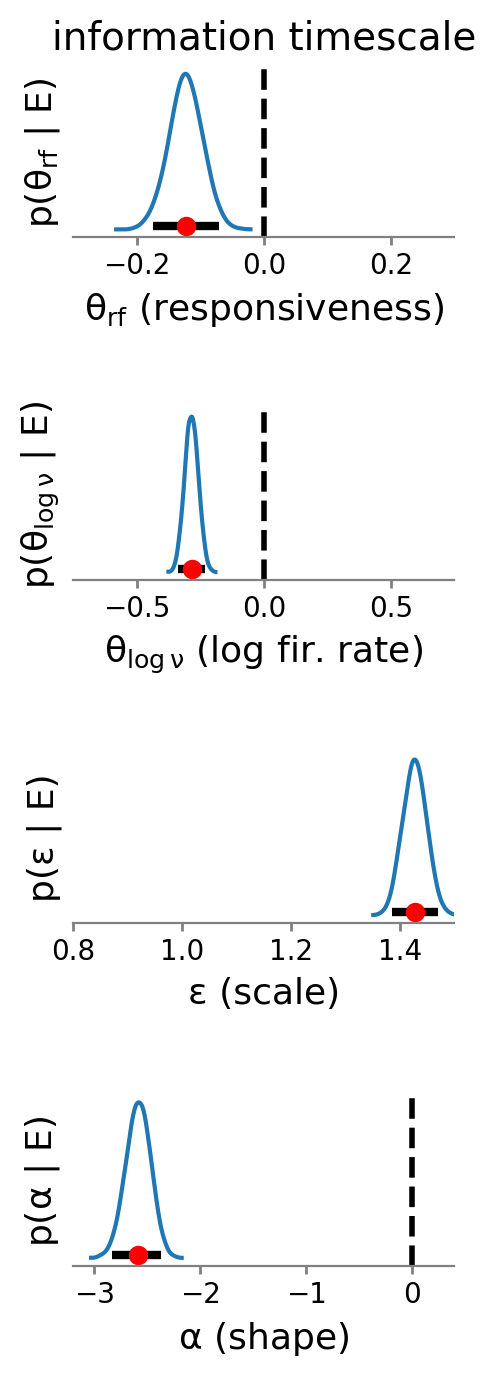

tau_R spontaneous
b_os_rf $\mathrm{θ_{rf}}$ (responsiveness)
median:  -0.1901066618891132
b_log_fr $θ_{\log \nu}$ (log fir. rate)
median:  -0.34566695915582313
epsilon ε (scale)
median:  1.3988477271924635
alpha $\alpha$ (shape)
median:  -2.61637350870009


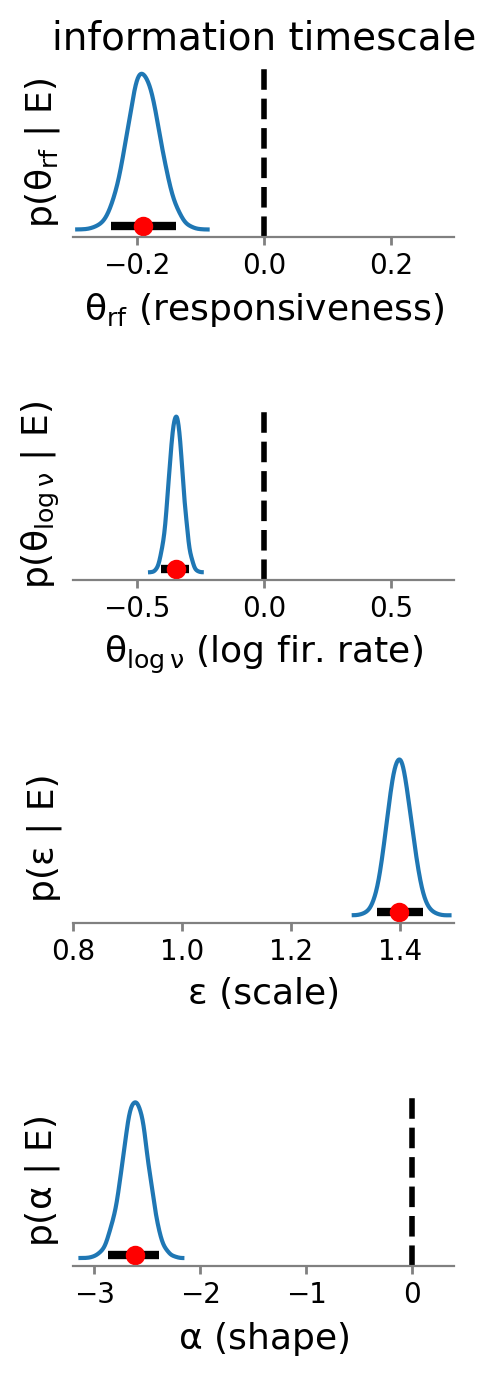

tau_R natural_movie_one_more_repeats
b_os_rf $\mathrm{θ_{rf}}$ (responsiveness)
median:  -0.19961188268076757
b_log_fr $θ_{\log \nu}$ (log fir. rate)
median:  -0.32282544328611157
epsilon ε (scale)
median:  1.3400624452637708
alpha $\alpha$ (shape)
median:  -2.006935868545119


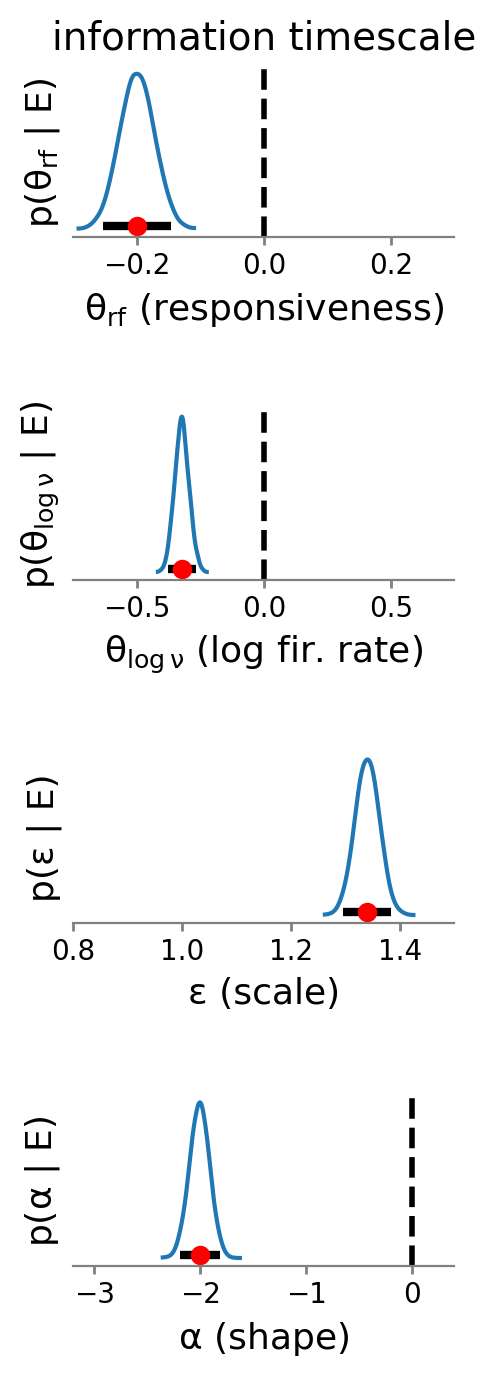

R_tot natural_movie_three
b_os_rf $\mathrm{θ_{rf}}$ (responsiveness)
median:  0.05121456428491539
b_log_fr $θ_{\log \nu}$ (log fir. rate)
median:  -0.6261052635069049
epsilon ε (scale)
median:  0.9218958730543305


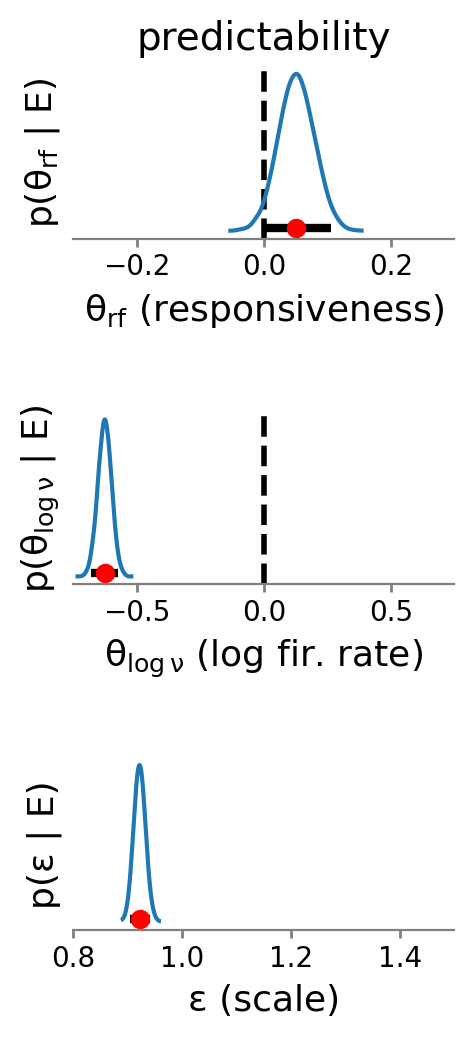

R_tot spontaneous
b_os_rf $\mathrm{θ_{rf}}$ (responsiveness)
median:  -0.053335534602233906
b_log_fr $θ_{\log \nu}$ (log fir. rate)
median:  -0.5426661832189084
epsilon ε (scale)
median:  0.9581126723721443


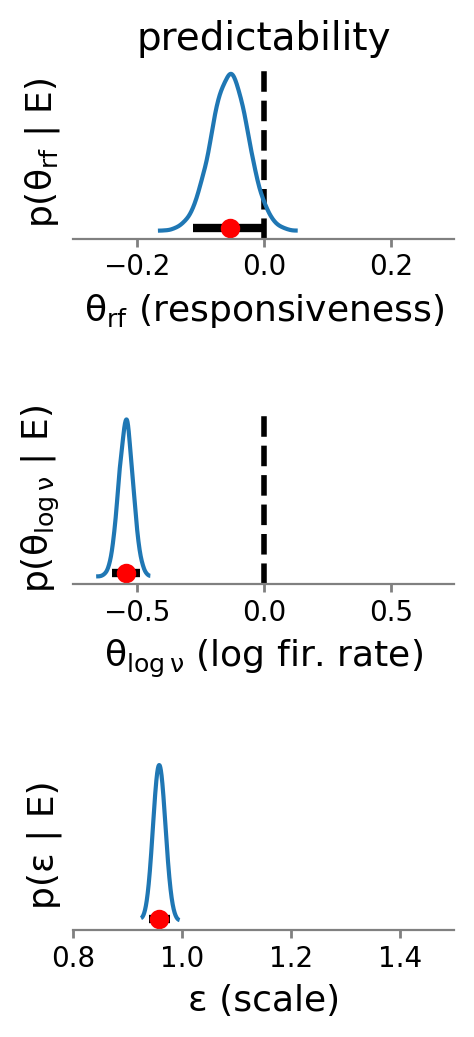

R_tot natural_movie_one_more_repeats
b_os_rf $\mathrm{θ_{rf}}$ (responsiveness)
median:  0.05217819238122882
b_log_fr $θ_{\log \nu}$ (log fir. rate)
median:  -0.6151679179228667
epsilon ε (scale)
median:  0.9376355773633465


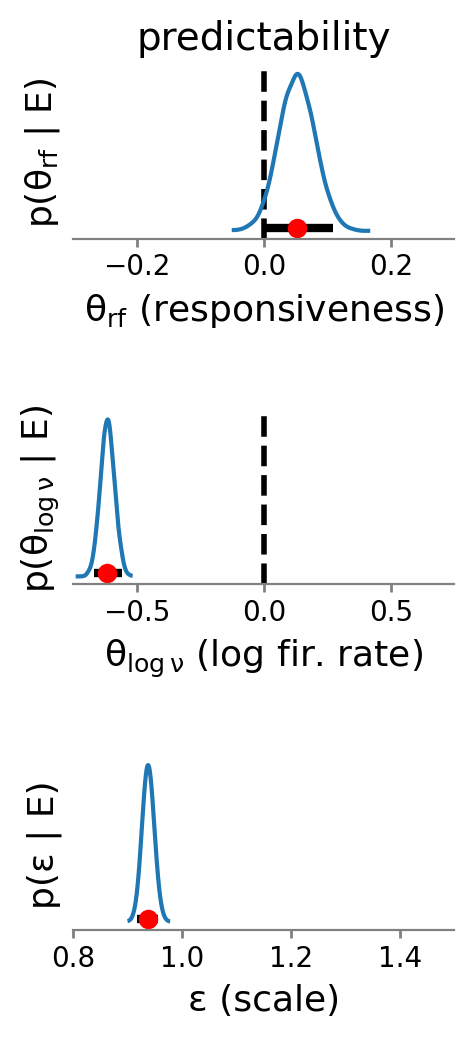

  0%|          | 0/9 [00:00<?, ?it/s]

tau_double natural_movie_three
b_os_rf $\mathrm{θ_{rf}}$ (responsiveness)
median:  -0.08359802197491022
b_log_fr $θ_{\log \nu}$ (log fir. rate)
median:  0.49449285295712
epsilon ε (scale)
median:  1.3183978141364885
alpha $\alpha$ (shape)
median:  -1.9733910682421363


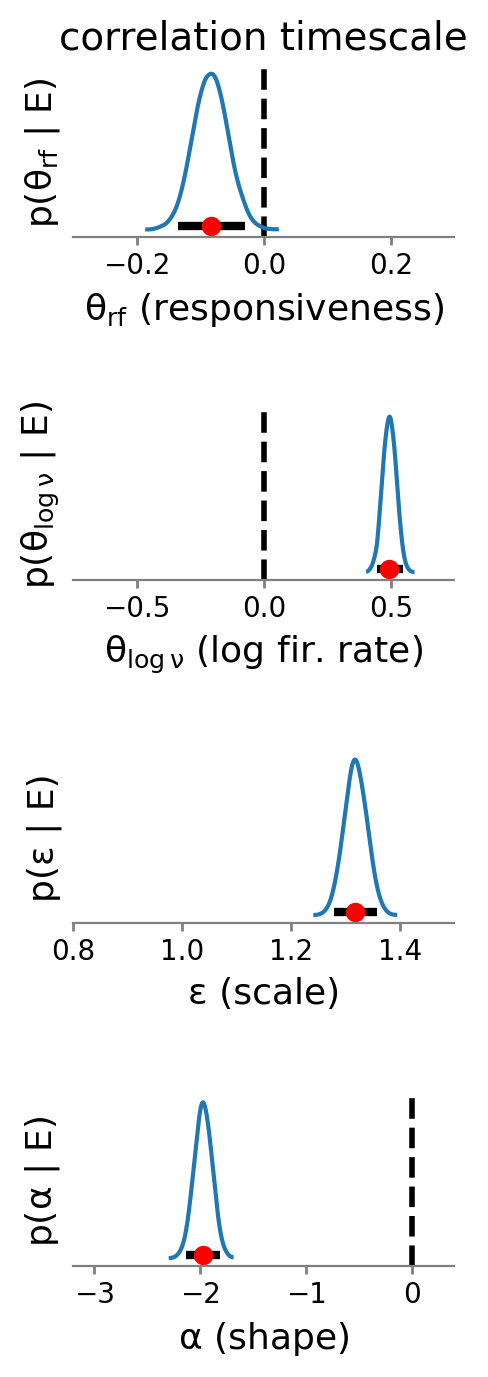

tau_double spontaneous
b_os_rf $\mathrm{θ_{rf}}$ (responsiveness)
median:  -0.18983639488003612
b_log_fr $θ_{\log \nu}$ (log fir. rate)
median:  0.36190710774069174
epsilon ε (scale)
median:  1.2835281572435215
alpha $\alpha$ (shape)
median:  -2.1732995358450404


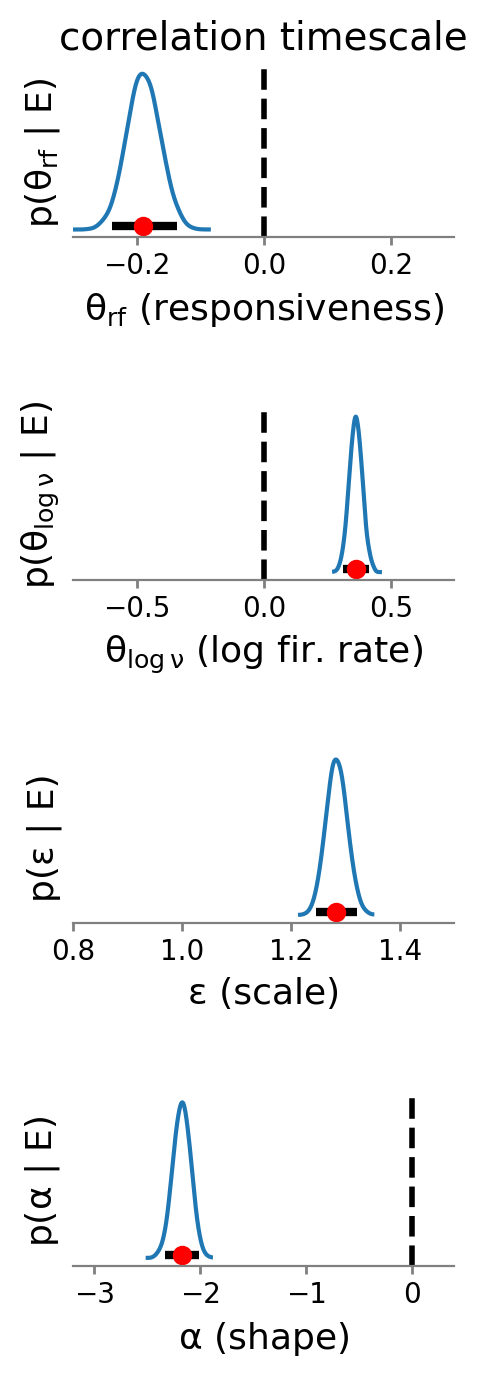

tau_double natural_movie_one_more_repeats
b_os_rf $\mathrm{θ_{rf}}$ (responsiveness)
median:  -0.1531614042469295
b_log_fr $θ_{\log \nu}$ (log fir. rate)
median:  0.49413114855835094
epsilon ε (scale)
median:  1.217603305627149
alpha $\alpha$ (shape)
median:  -1.4606519202424695


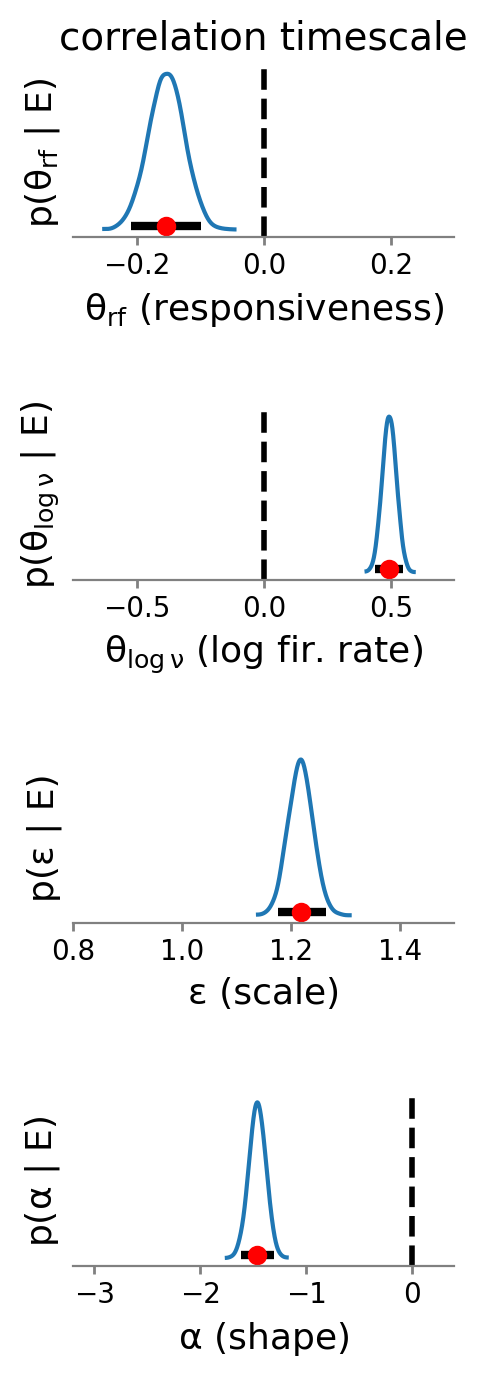

tau_R natural_movie_three
b_os_rf $\mathrm{θ_{rf}}$ (responsiveness)
median:  -0.11902032819481219
b_log_fr $θ_{\log \nu}$ (log fir. rate)
median:  -0.2853358499807969
epsilon ε (scale)
median:  1.4310430040512432
alpha $\alpha$ (shape)
median:  -2.5868397394116327


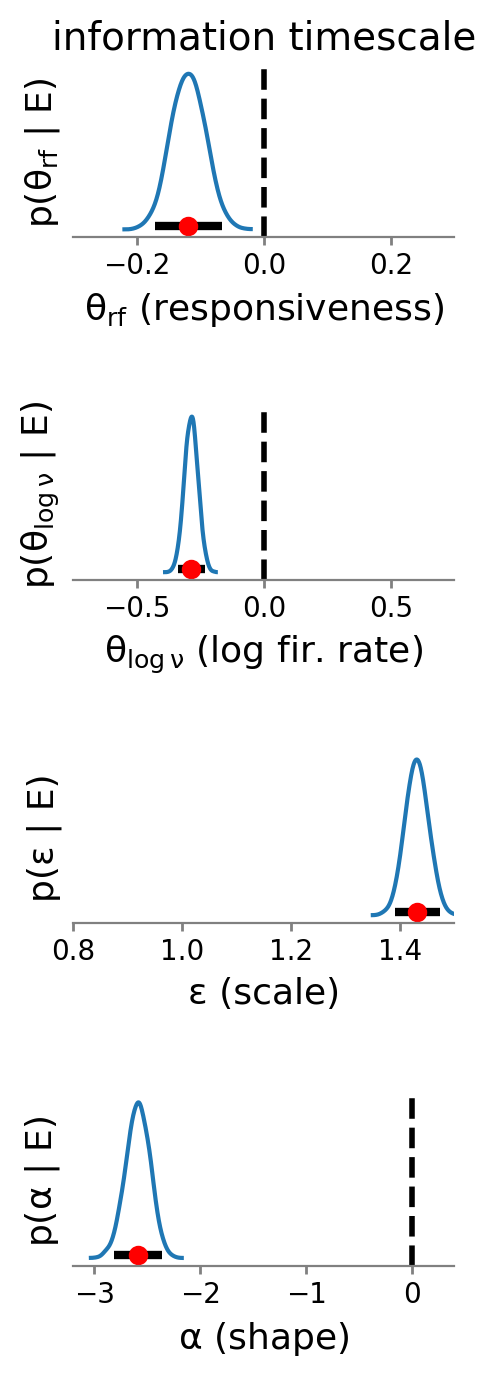

tau_R spontaneous
b_os_rf $\mathrm{θ_{rf}}$ (responsiveness)
median:  -0.19571846395318993
b_log_fr $θ_{\log \nu}$ (log fir. rate)
median:  -0.34402735019888053
epsilon ε (scale)
median:  1.4006492884595168
alpha $\alpha$ (shape)
median:  -2.590921454061916


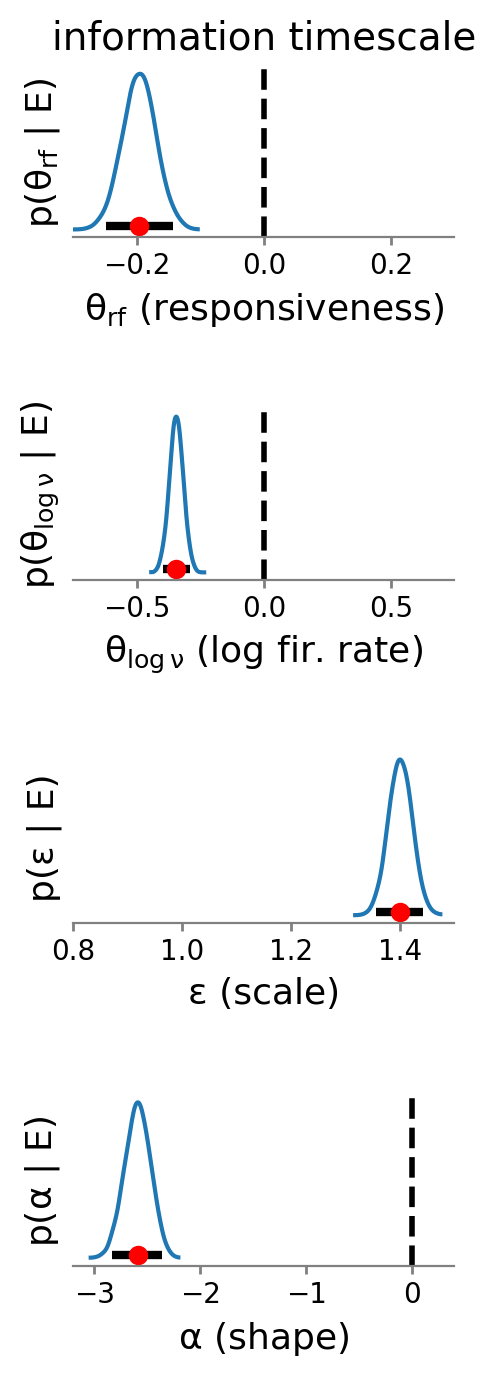

tau_R natural_movie_one_more_repeats
b_os_rf $\mathrm{θ_{rf}}$ (responsiveness)
median:  -0.19679598753547378
b_log_fr $θ_{\log \nu}$ (log fir. rate)
median:  -0.3186216561248104
epsilon ε (scale)
median:  1.3448376304437797
alpha $\alpha$ (shape)
median:  -2.0157917529635725


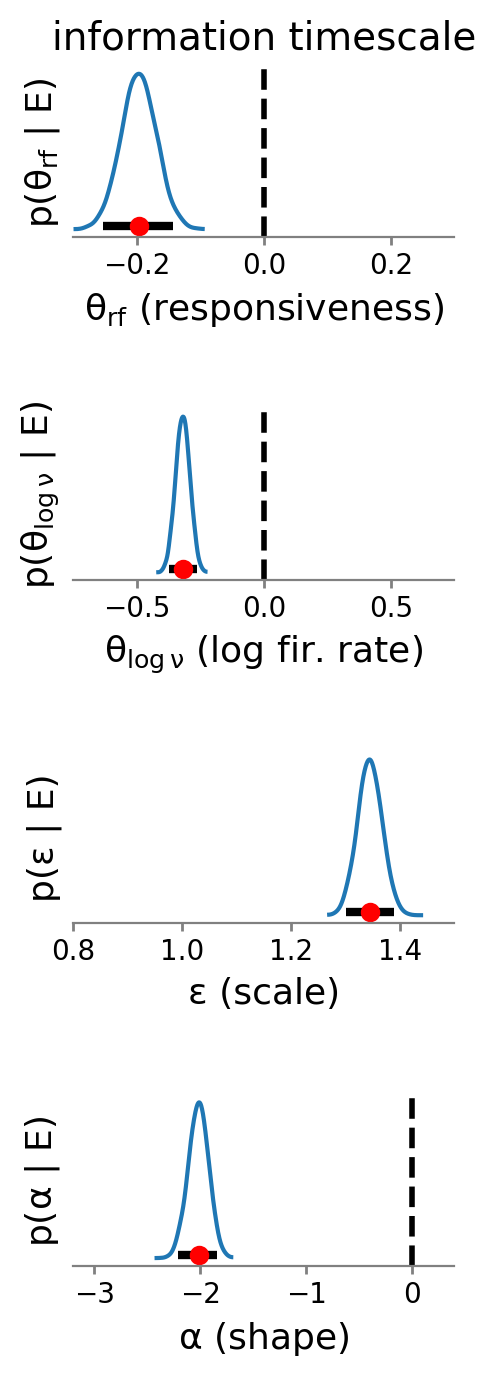

R_tot natural_movie_three
b_os_rf $\mathrm{θ_{rf}}$ (responsiveness)
median:  0.03396678528824279
b_log_fr $θ_{\log \nu}$ (log fir. rate)
median:  -0.6286994689863427
epsilon ε (scale)
median:  0.9216720835867065


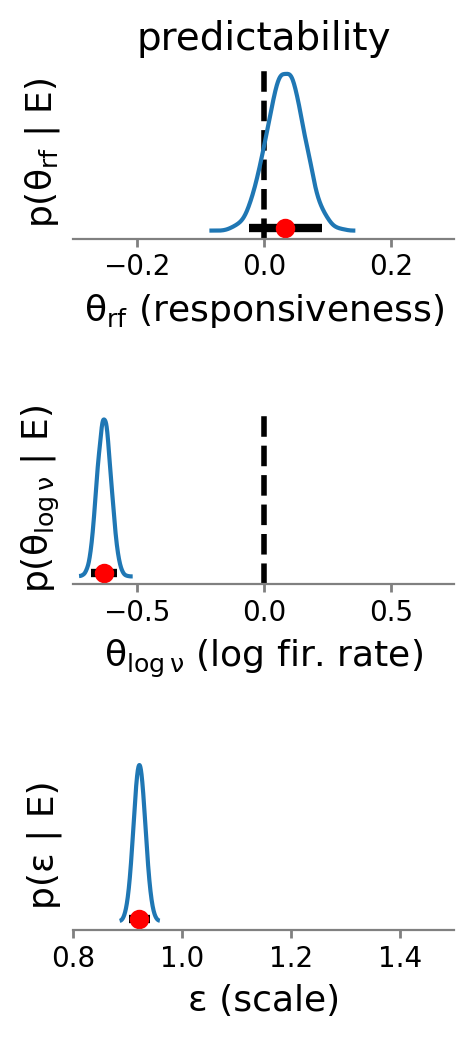

R_tot spontaneous
b_os_rf $\mathrm{θ_{rf}}$ (responsiveness)
median:  -0.05593757563362894
b_log_fr $θ_{\log \nu}$ (log fir. rate)
median:  -0.5439161436389724
epsilon ε (scale)
median:  0.9581771728391519


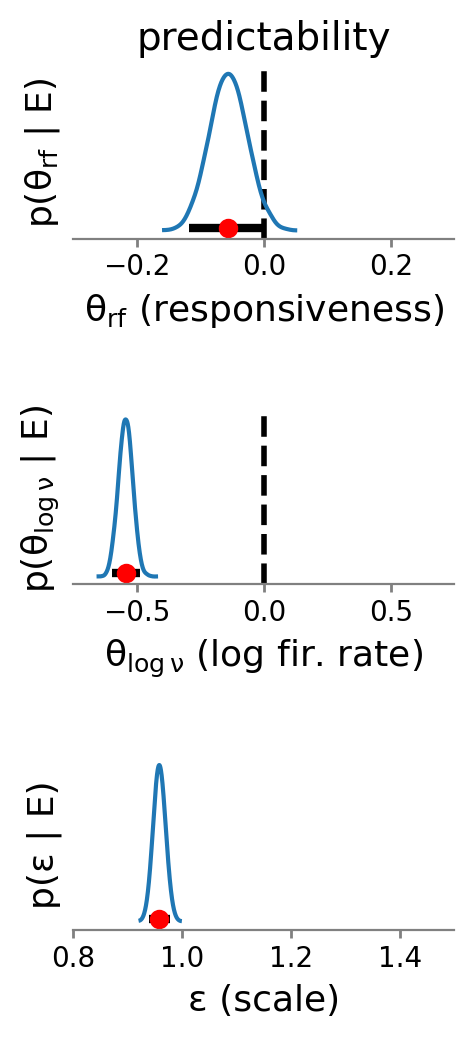

R_tot natural_movie_one_more_repeats
b_os_rf $\mathrm{θ_{rf}}$ (responsiveness)
median:  0.04800173292488747
b_log_fr $θ_{\log \nu}$ (log fir. rate)
median:  -0.6174859166653558
epsilon ε (scale)
median:  0.9382246051457106


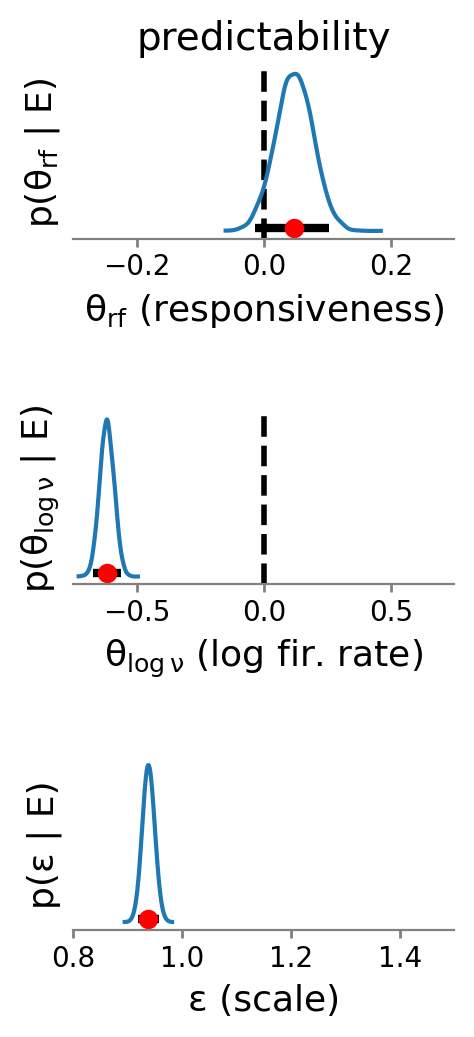

In [13]:
# posterior visualization (non-hierarchical parameters) for hierarchy score model

model = "lmm"
measures = ["tau_double", "tau_R", "R_tot"]
measure_names = {"tau_double": "correlation timescale", "tau_R": "information timescale", "R_tot": "predictability"}
stimuli = ["natural_movie_three", "spontaneous", "natural_movie_one_more_repeats"]
variables = ["b_os_rf", "b_log_fr", "epsilon", "alpha"]
variable_symbols = [r'$\mathrm{θ_{rf}}$', r'$θ_{\log \nu}$', 'ε', r'$\alpha$']
x_labels = [r'$\mathrm{θ_{rf}}$ (responsiveness)', r'$θ_{\log \nu}$ (log fir. rate)', 'ε (scale)', r'$\alpha$ (shape)']
# a dict of x_labels with variables as keys
x_labels_dict = {var: x_label for var, x_label in zip(variables, x_labels)}
# same for variable_symbols
variable_symbols_dict = {var: var_name for var, var_name in zip(variables, variable_symbols)}

combinations = list(product(measures, stimuli))
rc_kwargs = {
    "xtick.labelsize" : 10,
    "ytick.labelsize" : 10,
    "axes.titlesize" : 14,
    "axes.labelsize" : 13,
    "font.size" : 10,
}
for model in ["lmm", "sgm"]:
    with plt.rc_context(rc_kwargs):
        # Plot hierarchy score posteriors for different measures and stimuli
        for meas, stim in tqdm(combinations):
            print(meas, stim)
            idata = az.from_netcdf(f"{data_dir}/bayes_cortex_{model}_{meas}_{stim}.nc")

            if meas == "R_tot":
                n_axes = 3
                fig_height = 5.4
            else:
                n_axes = 4
                fig_height = 7.5

            fig, axes = plt.subplots(
                n_axes, 1, figsize=(plot_settings["panel_width"], fig_height)
            )
            fig.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1, hspace=1)
            axes[0].axvline(x=0, ls="--", lw=2, color="0.0")
            axes[1].axvline(x=0, ls="--", lw=2, color="0.0")
            if n_axes == 4:
                axes[3].axvline(x=0, ls="--", lw=2, color="0.0")
            # if args.measure == "tau_C":
            #     ax1.set_xlim([-0.05,0.22])
            #     ax3.set_xlim([-0.24,0.44])
            # if args.measure == "tau_R":
            #     ax1.set_xlim([-0.02,0.14])
            #     ax3.set_xlim([-0.12,0.27])
            # if args.measure == "R_tot":
            #     ax1.set_xlim([-0.18,0.06])
            #     ax3.set_xlim([-0.31,0.21])

            # if meas == "R_tot":
            #     bw = 0.01
            # else:
            #     bw = 0.05

            for ax, var in zip(axes, variables[:n_axes]):
                if var == "alpha":
                    bw=0.025
                else:
                    bw=0.006
                print(var, x_labels_dict[var])
                ph.plot_posterior(
                    idata,
                    ax=ax,
                    var_names = [var],
                    point_estimate="median",
                    hdi_prob=0.95,
                    bw=bw,
                )
                ax.set_xlabel(x_labels_dict[var])
                ax.set_ylabel('p({} | E)'.format(variable_symbols_dict[var]))
                ax.set_title("")
                if var == "b_os_rf":
                    ax.set_xlim([-0.3, 0.3])
                elif var == "b_log_fr":
                    ax.set_xlim([-0.75, 0.75])
                elif var == "epsilon":
                    ax.set_xlim([0.8, 1.5])
                elif var == "alpha":
                    ax.set_xlim([-3.2, 0.4])
            # else: # ranges for timescale posteriors
            #     ax1.set_xlim([-0.1, 1.2]) # xrange for mean slope
            #     ax2.set_xlim([-0.1, 1.2]) # xrange for std slope
            #     ax3.set_xlim([-2.7, 2.7]) # xrange for session slope

            # for ax in [ax1, ax2, ax3]:
            #     utl.make_plot_pretty(ax)
            axes[0].set_title(measure_names[meas], ha='center')
            fig.savefig(f"../img/bayes_cortex_{model}_non_hierarchical_posteriors_{meas}_{stim}.pdf", bbox_inches="tight", dpi=300)
            plt.show()
            plt.close()

In [2]:
# Load results to compute the mean and standard deviation of the log data to invert the transformation for plotting the posterior predictive checks

df = pd.read_hdf(f"{data_dir}/all_units_merged_blocks_with_spont.h5", key="meta_df")

# add metrics from image selectivity etc.
df = utl.load_metrics(
    df.reset_index(),
    data_dir,
    csvs=[
        # we need to combine data from different files, because we use spontaneous and natural movie stimuli
        "brain_observatory_1.1_analysis_metrics.csv",
        "functional_connectivity_analysis_metrics.csv",
    ],
    cols=["on_screen_rf"],
)
df = utl.add_structure_and_hierarchy_scores(df)
df = utl.load_experiments(df, data_dir)

# pymc does not like bools:
log.info(f'invalid metric rows: {df["on_screen_rf"].isna().sum()}')
df["on_screen_rf"] = df["on_screen_rf"].astype("int")

len_before = len(df)
df = df.query("tau_R > 0.0")
df = df.query("tau_double > 0.0 & tau_double < 10.0")
# timescales above 10s are likely an inference problems,
# as we have 600 - 800 seconds of data. cf. https://arxiv.org/abs/2007.03367
len_after = len(df)
log.info(f"removed {len_before - len_after} rows due to unexpected timescales")

# some further preprocessing is done in the model class
# see ana/bayesian_models.py

# Models only applied to data of cortical areas
df = df.query(f"structure_name in ['V1', 'LM', 'RL', 'AL', 'PM', 'AM']")


2024-07-12 10:28:27,283 | DEBUG    | its_utility | load_metrics | Loaded columns ['unit_id', 'on_screen_rf'] from /data.nst/lucas/projects/mouse_visual_timescales_predictability/paper_code/experiment_analysis/data/brain_observatory_1.1_analysis_metrics.csv
2024-07-12 10:28:27,576 | DEBUG    | its_utility | load_metrics | Loaded columns ['unit_id', 'on_screen_rf'] from /data.nst/lucas/projects/mouse_visual_timescales_predictability/paper_code/experiment_analysis/data/functional_connectivity_analysis_metrics.csv
2024-07-12 10:28:27,577 | INFO     | its_utility | load_metrics | Column on_screen_rf found in multiple dataframes.
2024-07-12 10:28:27,579 | DEBUG    | its_utility | load_metrics | Matched 6368 rows from meta_df in /data.nst/lucas/projects/mouse_visual_timescales_predictability/paper_code/experiment_analysis/data/brain_observatory_1.1_analysis_metrics.csv
2024-07-12 10:28:32,267 | DEBUG    | its_utility | load_metrics | Matched 11581 rows from meta_df in /data.nst/lucas/projects

  0%|          | 0/9 [00:00<?, ?it/s]

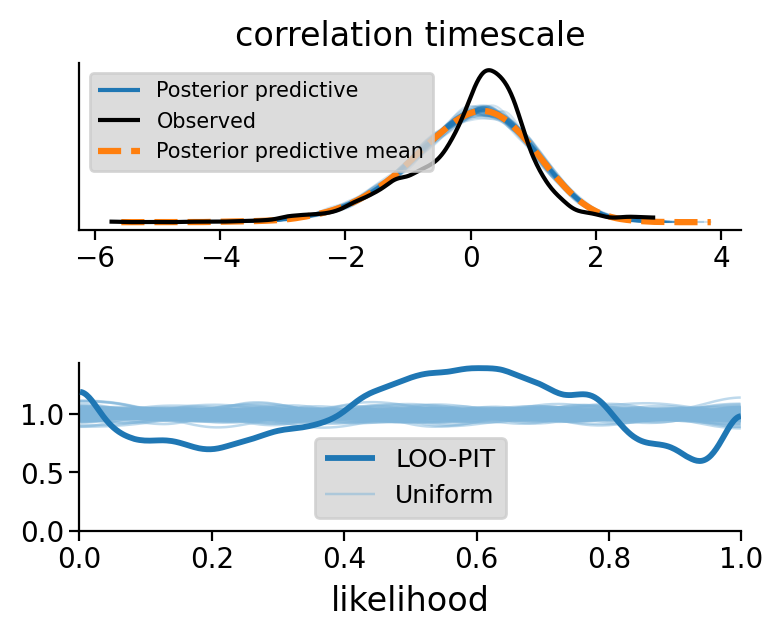

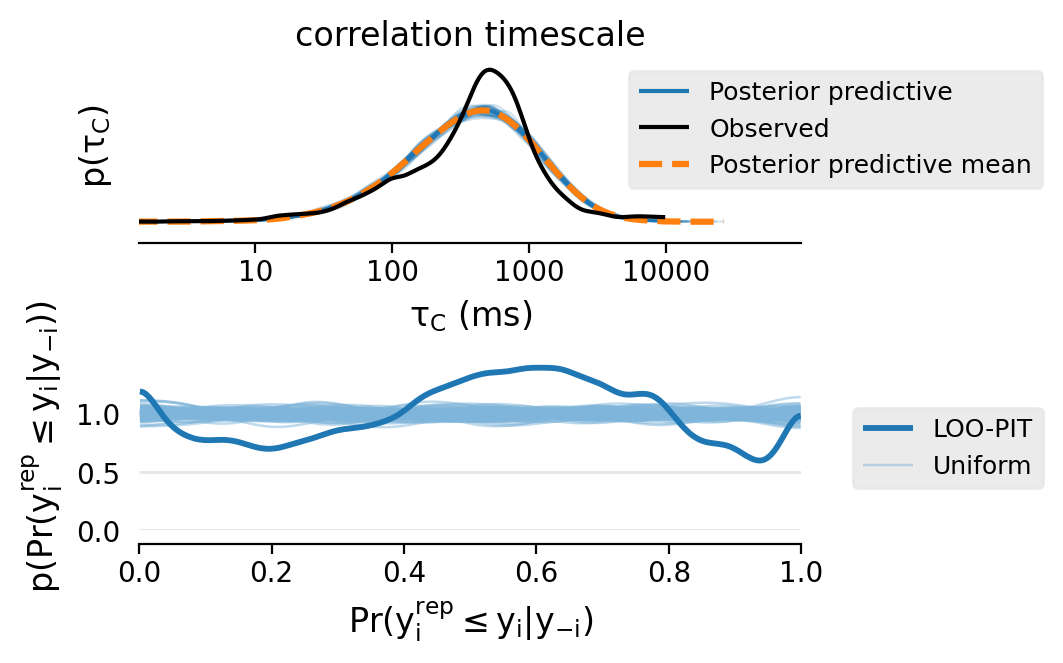

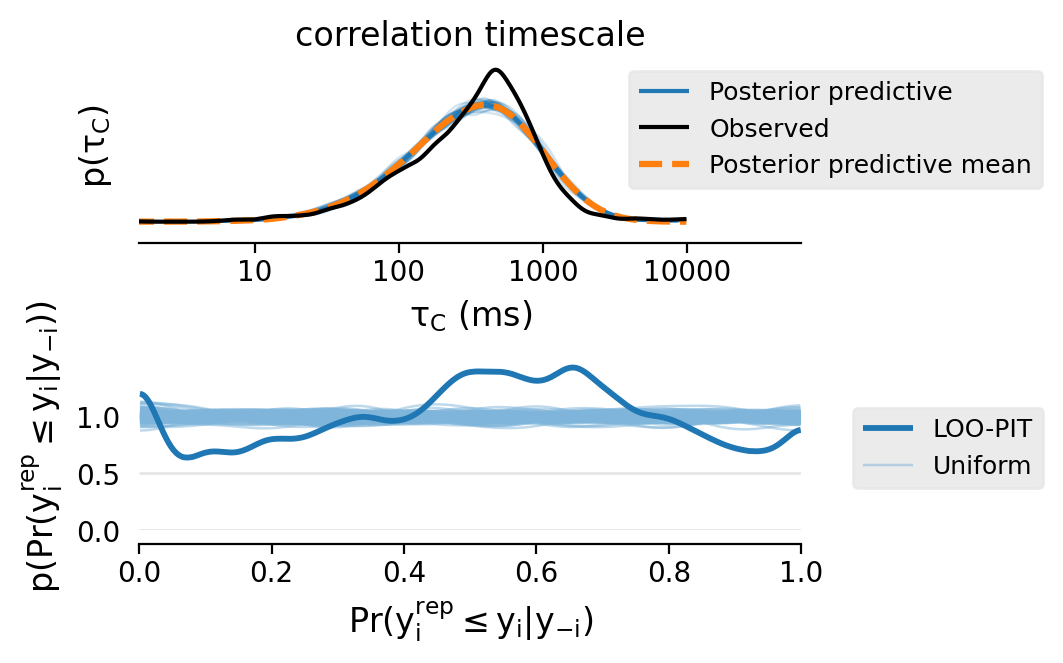

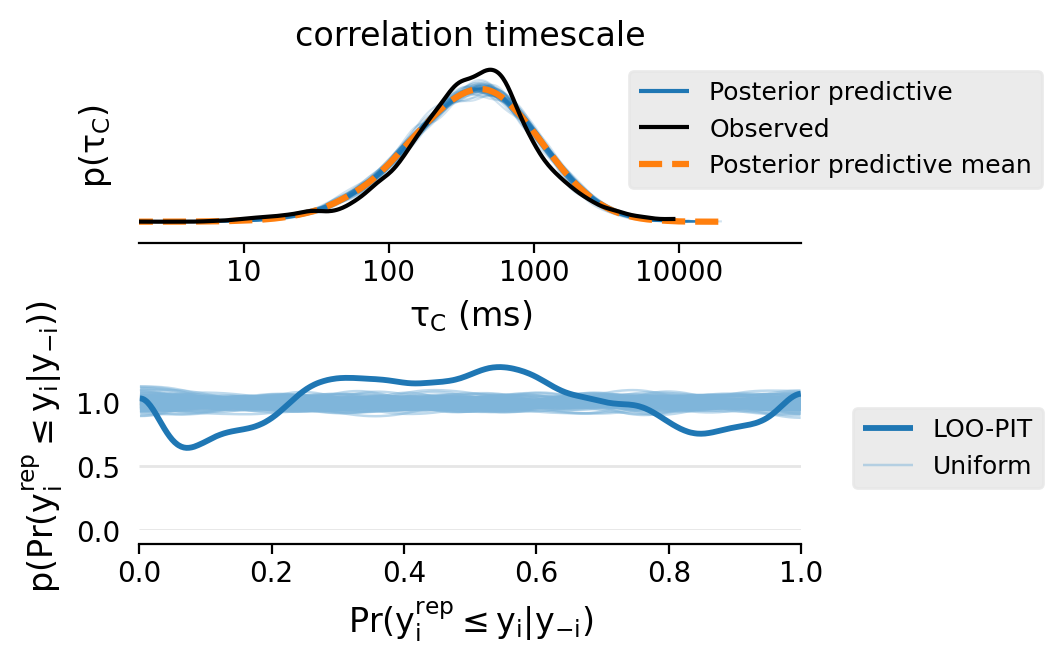

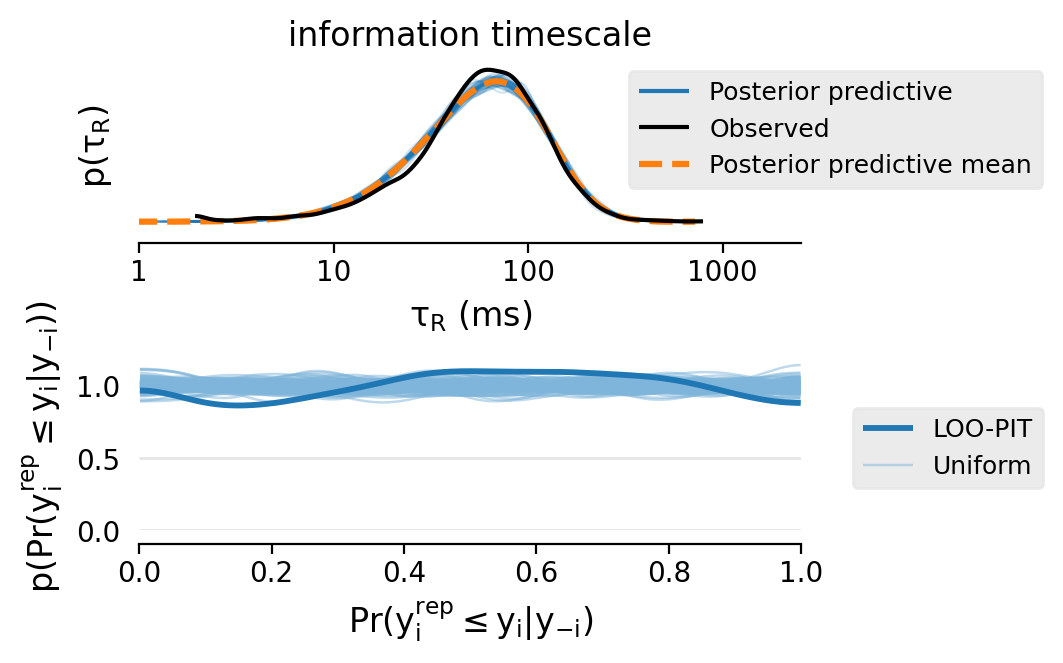

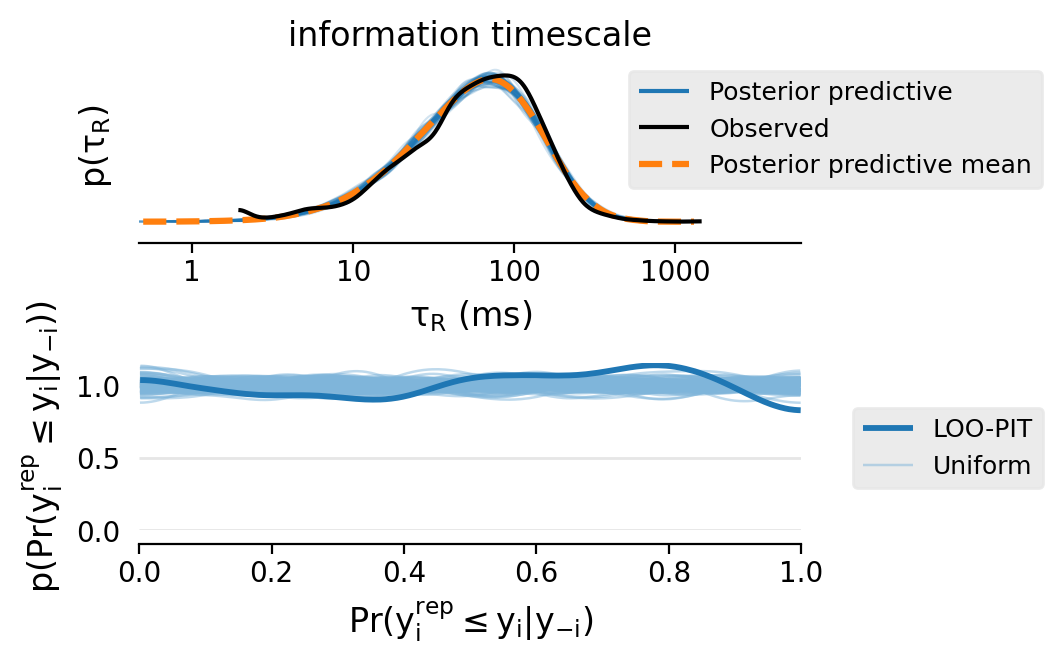

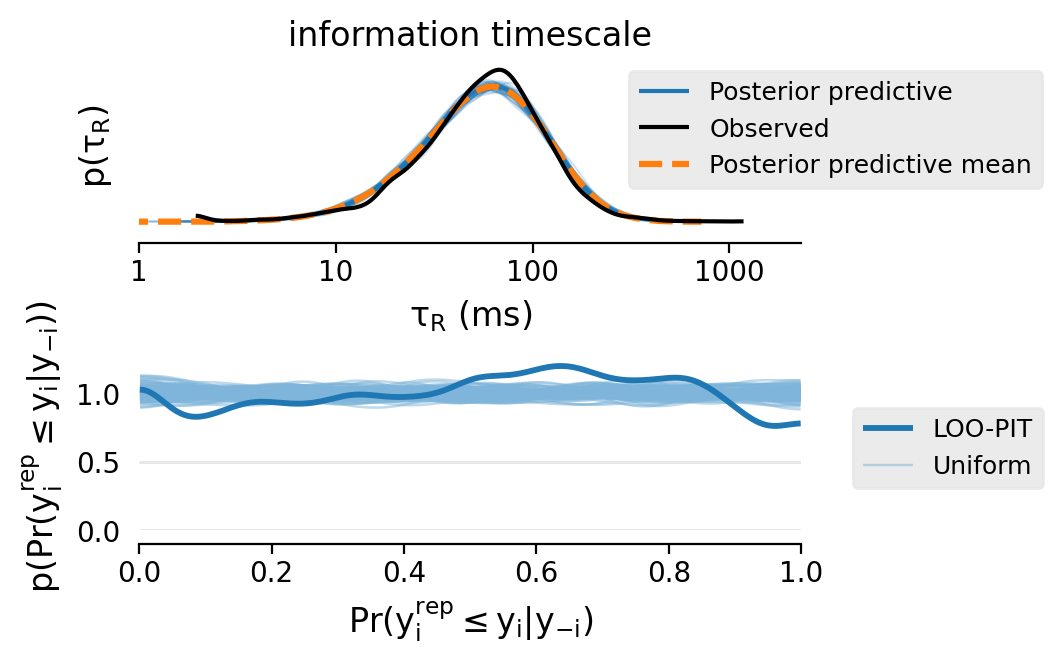

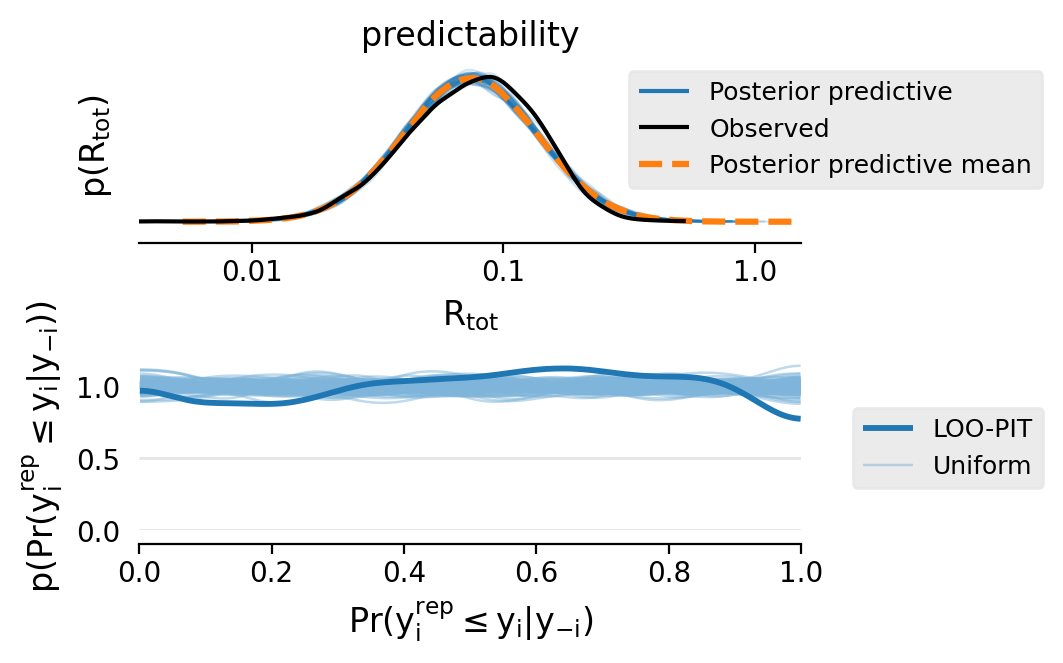

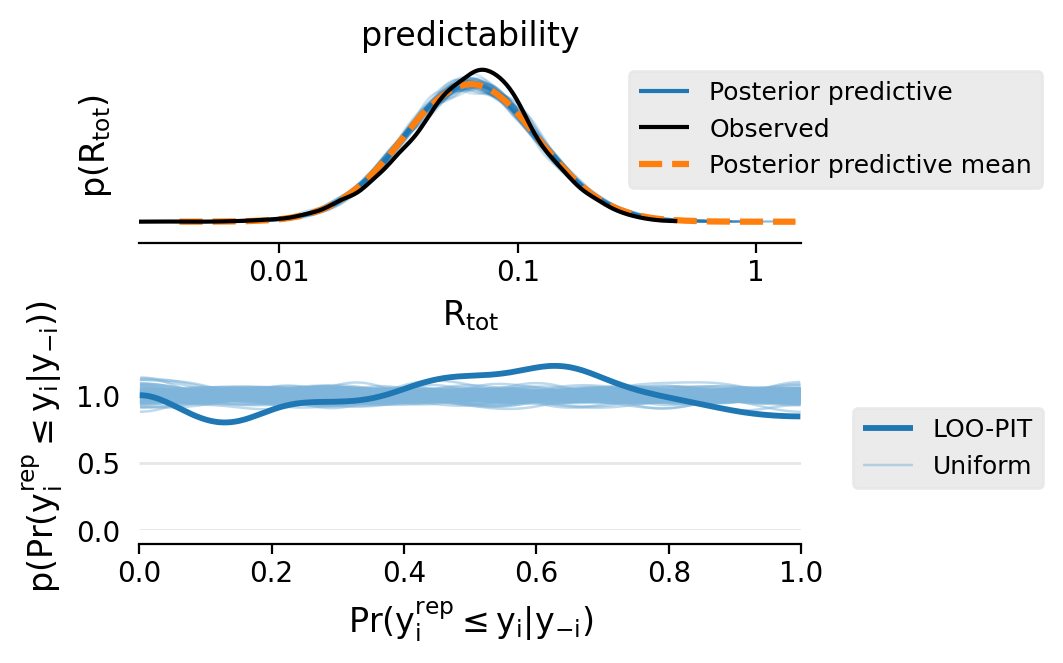

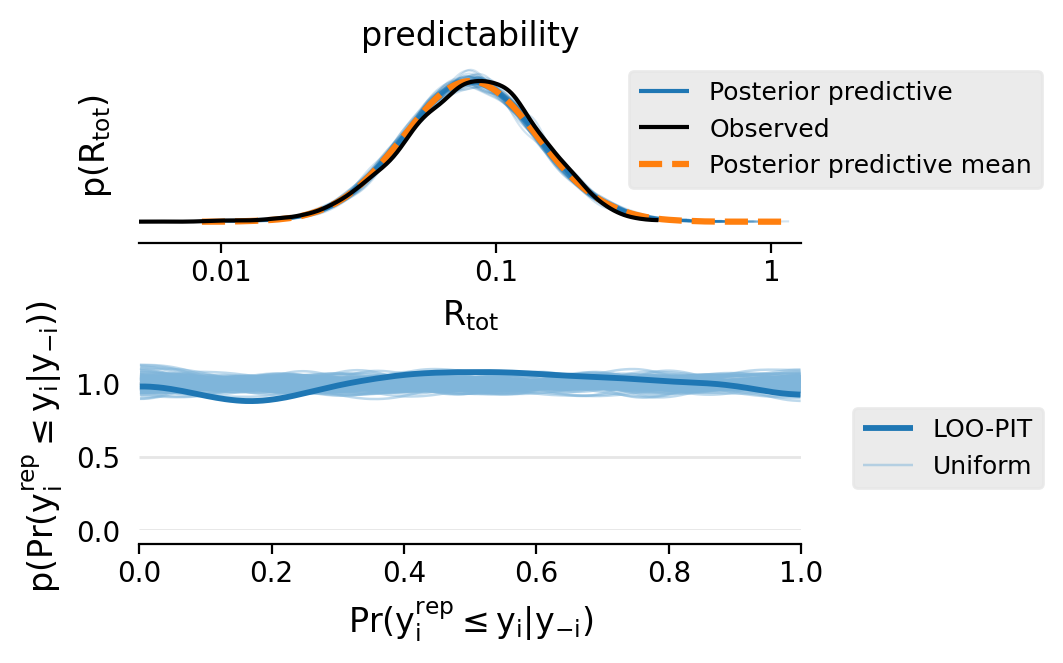

  0%|          | 0/9 [00:00<?, ?it/s]

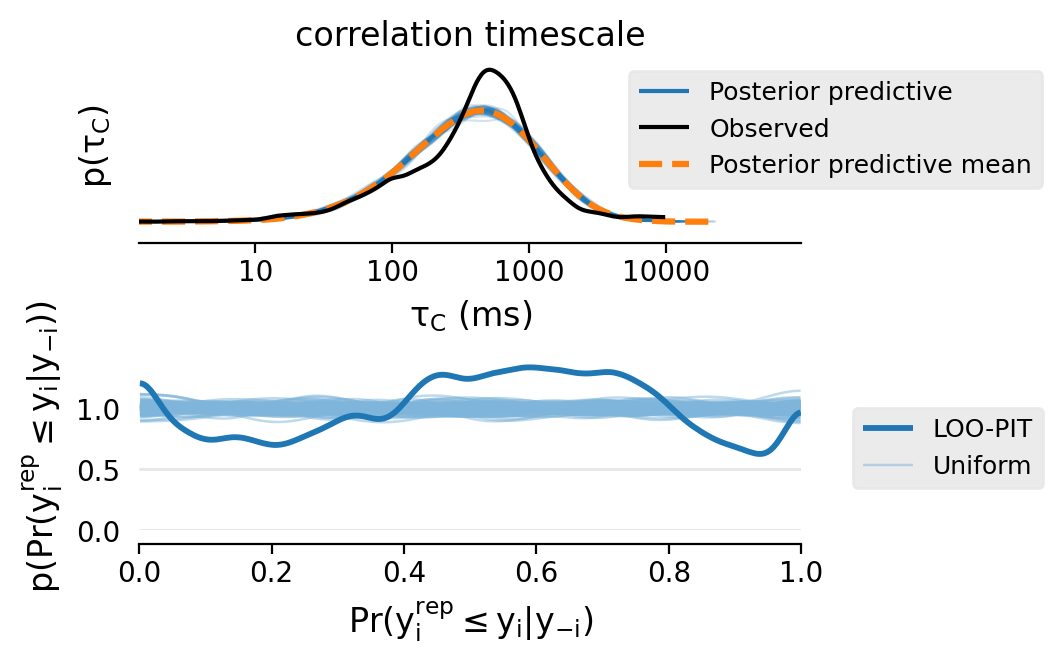

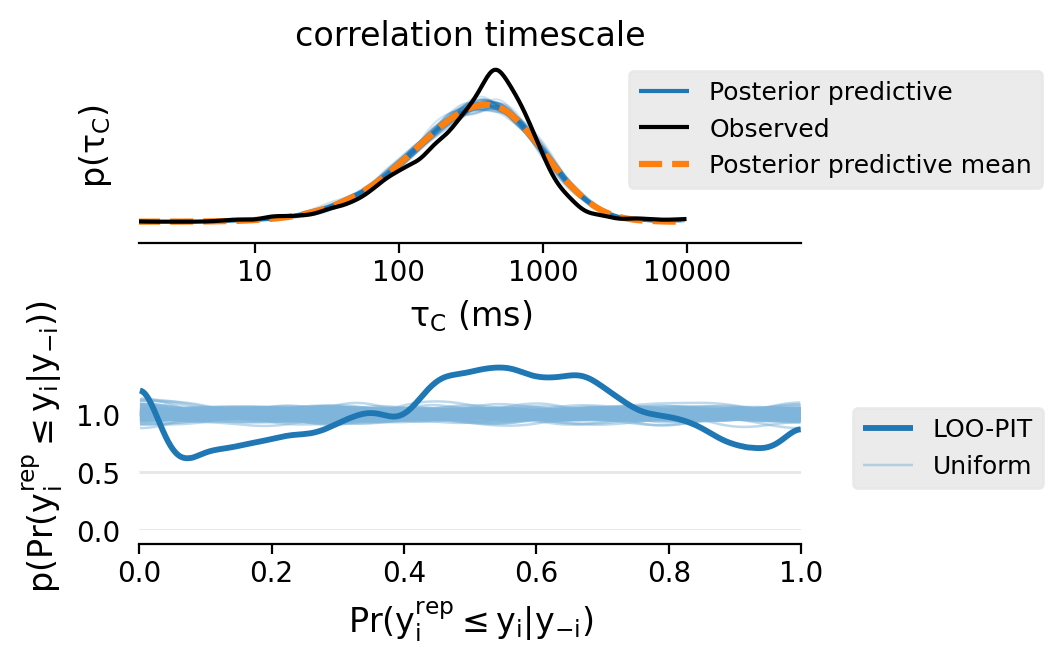

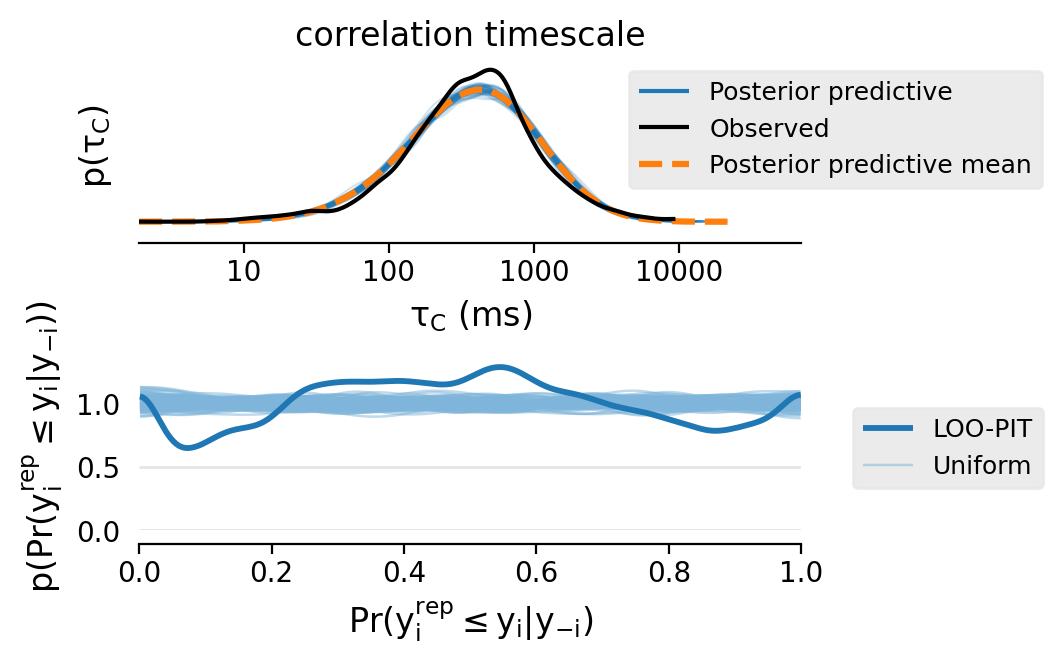

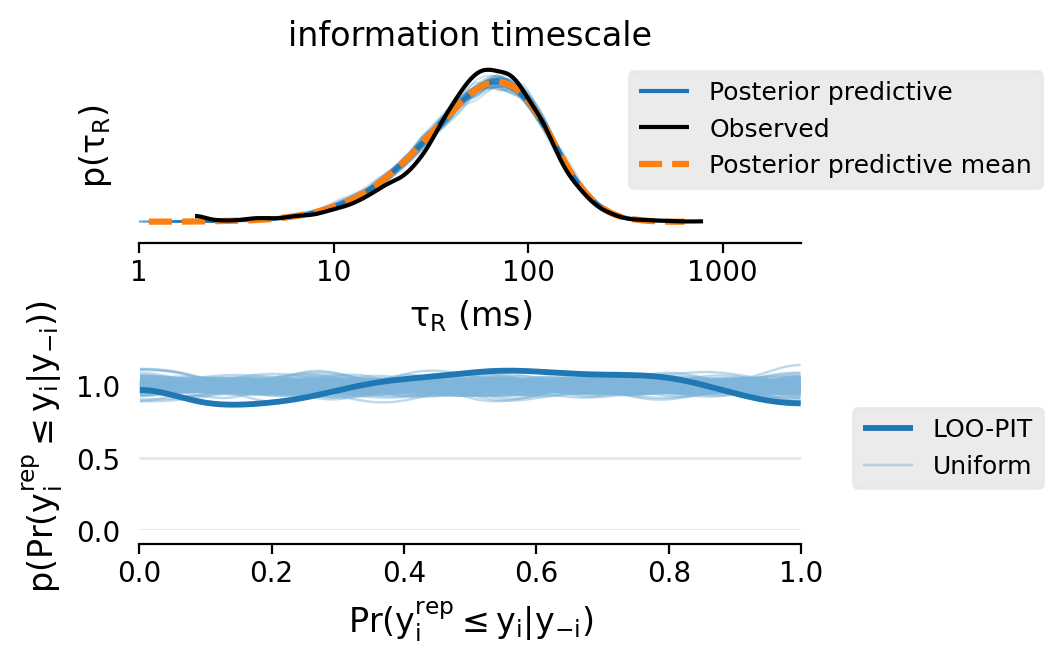

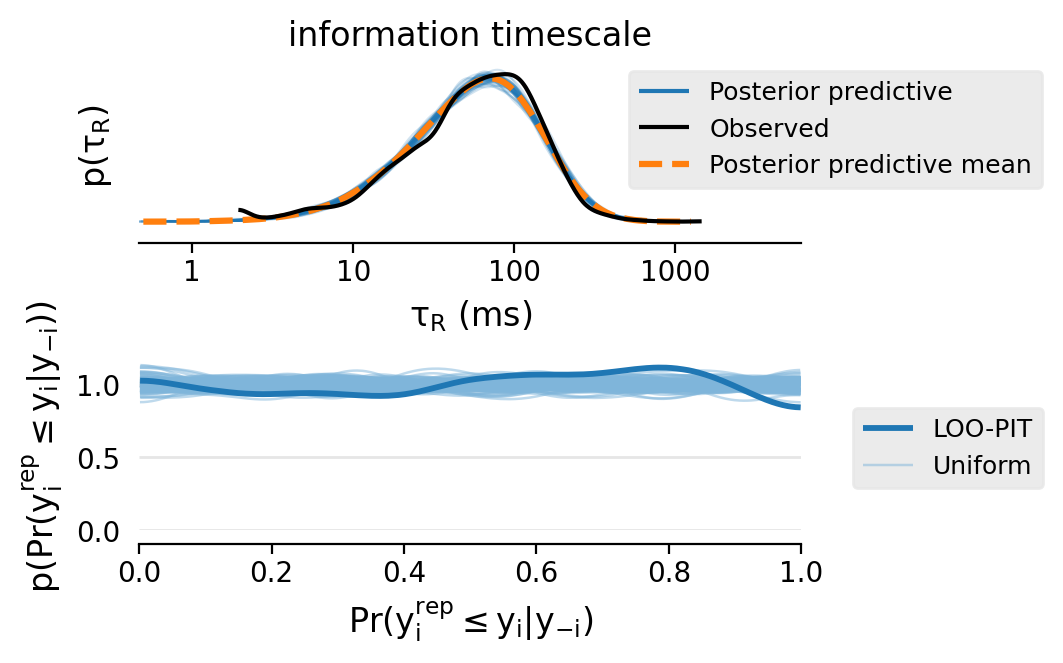

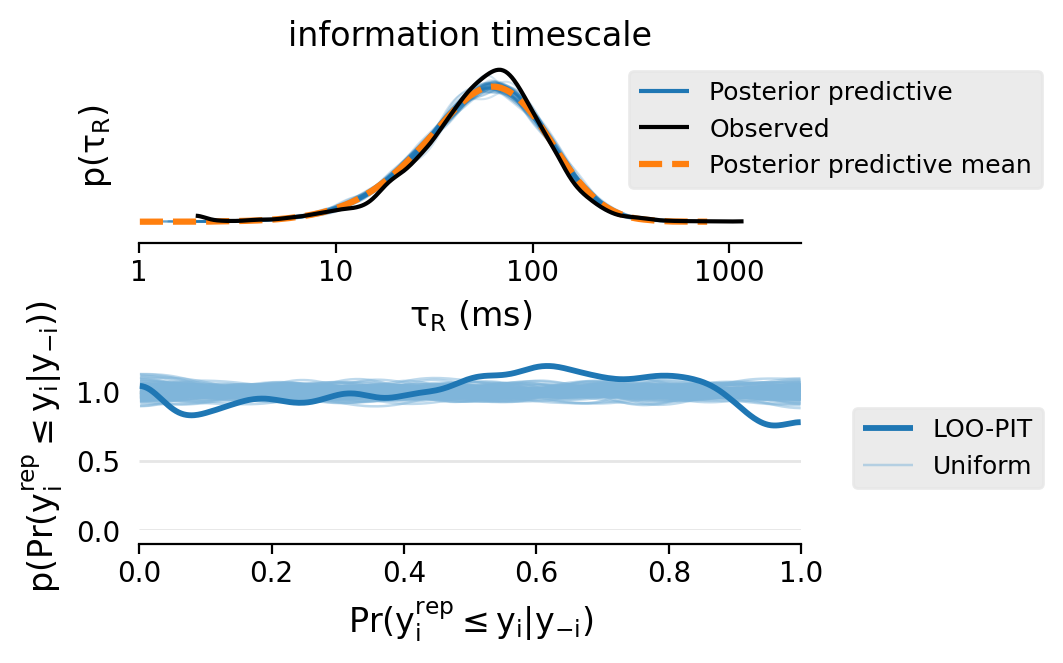

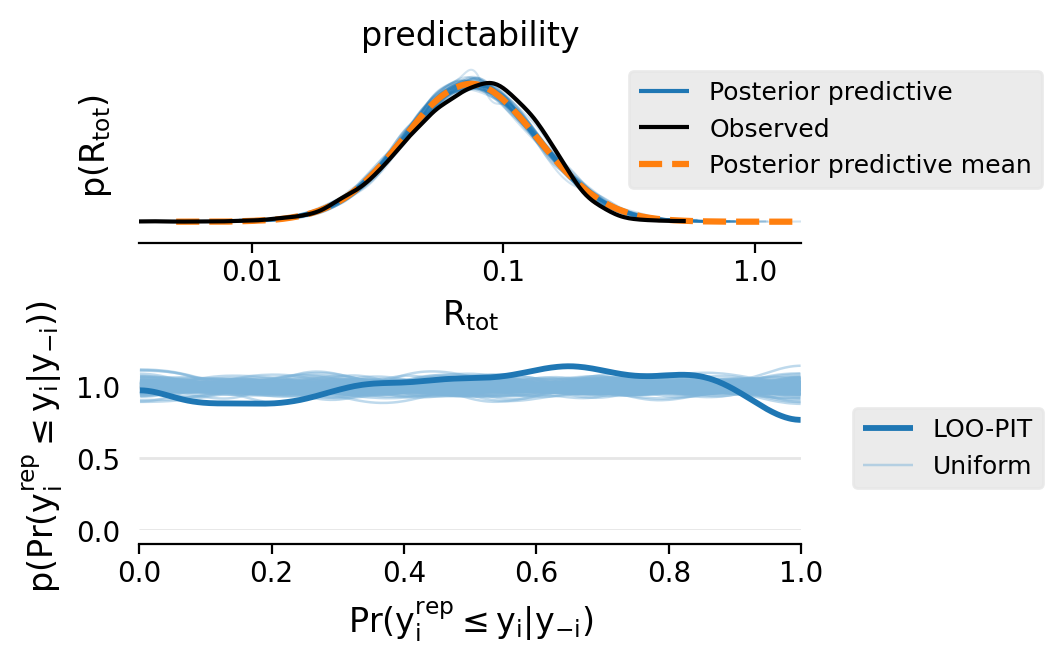

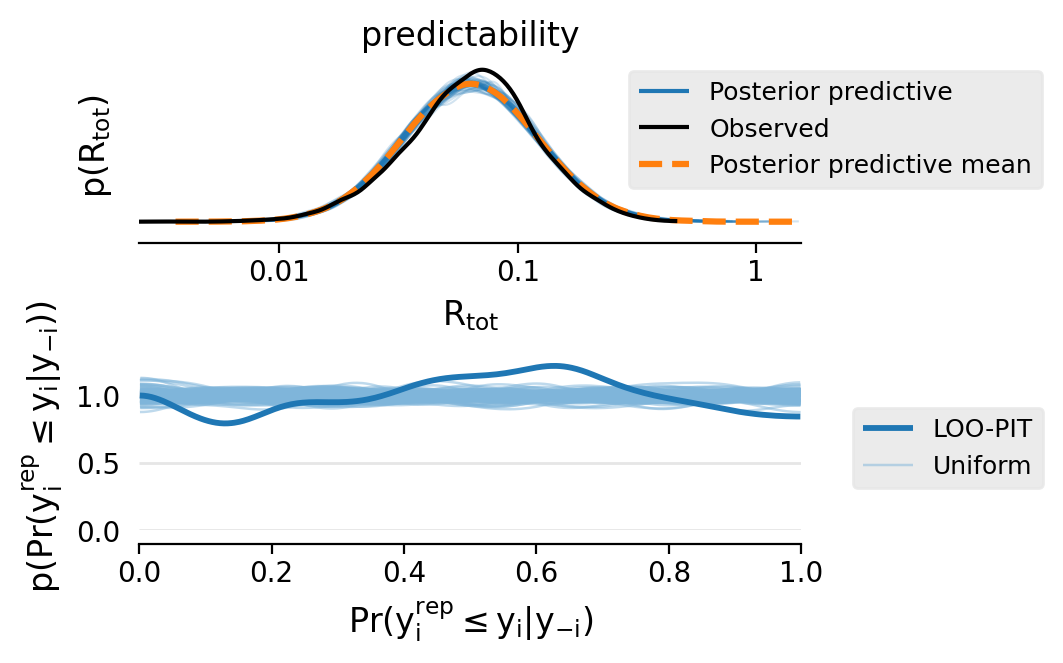

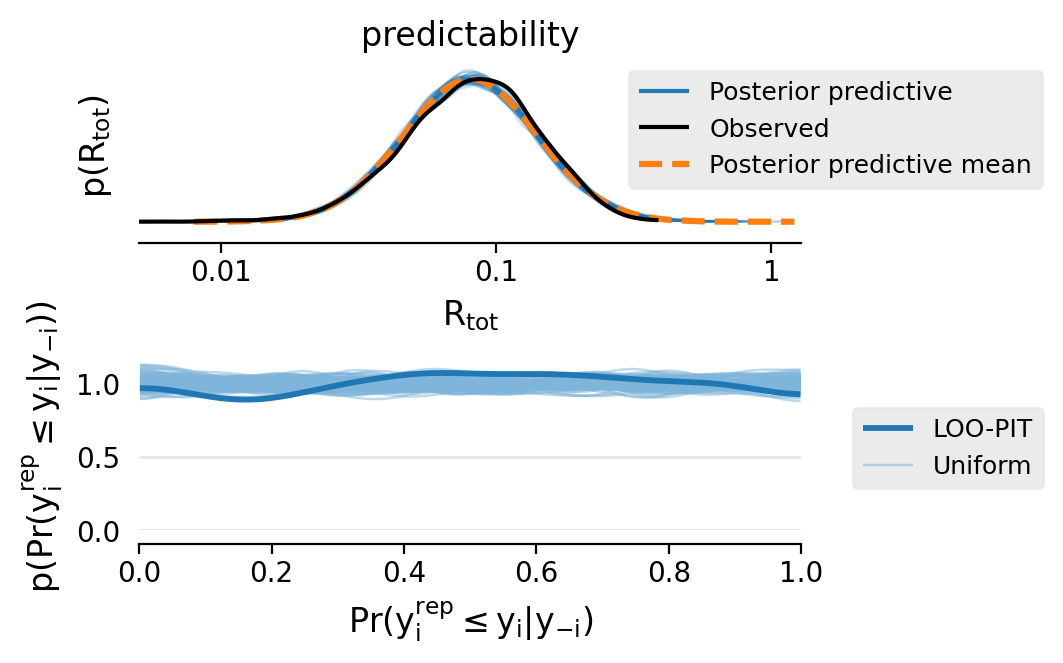

In [11]:
# Visualize Posterior predictive checks
import matplotlib.ticker as ticker
seed = 42

# cf https://oriolabrilpla.cat/python/arviz/pymc3/2019/07/31/loo-pit-tutorial.html
def plot_ppc_loopit_2p(idata, title, ax_ppc=None, ax1=None):
    if np.any(np.array([ax_ppc, ax1]) is None):
        fig = plt.figure(figsize=(12, 9))
        ax_ppc = fig.add_subplot(121)
        ax1 = fig.add_subplot(122)
    az.plot_ppc(idata, ax=ax_ppc, num_pp_samples=50, random_seed=seed)
    az.plot_loo_pit(idata, y="likelihood", ecdf=False, ax=ax1)
    ax_ppc.set_title(title, ha="center")
    ax_ppc.set_xlabel("")
    return np.array([ax_ppc, ax1])

# Compute the mean and standard deviation of the log data to invert the transformation for plotting the posterior predictive checks
def get_measure_log_mean_std(df, measure, stim):
    this_df = df.query(f"stimulus == '{stim}'")
    # Log transform
    log_values = np.log(this_df[measure])
    log_mean = log_values[log_values > -np.inf].mean()
    log_std = log_values[log_values > -np.inf].std()
    return log_mean, log_std

def make_plot_pretty(ax, grid=True):
    ax.tick_params(axis="x", top=False)
    ax.tick_params(axis="y", right=False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.tick_params(axis="x", direction="out")
    ax.tick_params(axis="y", length=0)

    for spine in ax.spines.values():
        spine.set_position(("outward", 5))

    ax.set_axisbelow(True)
    if grid == True:
        ax.grid(axis="y", color="0.9", linestyle="-", linewidth=1, zorder=0)

measures = ["tau_double", "tau_R", "R_tot"]
measure_names = {"tau_double": "correlation timescale", "tau_R": "information timescale", "R_tot": "predictability"}
stimuli = ["natural_movie_three", "spontaneous", "natural_movie_one_more_repeats"]

combinations = list(product(measures, stimuli))
rc_kwargs = {
    "xtick.labelsize" : 10,
    "ytick.labelsize" : 10,
    "axes.titlesize" : 12,
    "axes.labelsize" : 12,
    "font.size" : 10,
}
for model in ["lmm", "sgm"]:
    with plt.rc_context(rc_kwargs):
        # Plot hierarchy score posteriors for different measures and stimuli
        for meas, stim in tqdm(combinations):
            fig0 = plt.figure(figsize=(0.65 * plot_settings["textwidth"], 3))
            ax_ppc = fig0.add_subplot(211)
            ax1 = fig0.add_subplot(212)
            fig0.subplots_adjust(right=0.98, left=0.1, bottom=0.1, hspace=0.8)

            idata = az.from_netcdf(f"{data_dir}/bayes_cortex_{model}_{meas}_{stim}.nc")
            ax_ppc, ax1 = plot_ppc_loopit_2p(idata, measure_names[meas], ax_ppc, ax1)

            make_plot_pretty(ax_ppc)
            make_plot_pretty(ax1)

            # Invert the transformation for plotting the posterior predictive checks
            meas_log_mean, meas_log_std = get_measure_log_mean_std(df, meas, stim)
            inverse_z_trafo = lambda x: np.exp(x * meas_log_std + meas_log_mean)

            # format axis according to transformed data
            def format_label_transf(x, pos):
                x10 = inverse_z_trafo(x)
                if x10 >= 1:
                    return "{:.0f}".format(x10)
                if x10 >= 0.1:
                    return "{:.1f}".format(x10)
                elif x10 >= 0.01:
                    return "{:.2f}".format(x10)
                elif x10 >= 0.001:
                    return "{:.3f}".format(x10)

            ax_ppc.legend(loc=(0.74, 0.25))
            ax1.legend(loc=(1.078, 0.25))

            for legend in [ax_ppc.get_legend(), ax1.get_legend()]:
                frame = legend.get_frame()
                frame.set_facecolor("0.9")
                frame.set_edgecolor("0.9")

            ax_ppc.xaxis.set_major_formatter(ticker.FuncFormatter(format_label_transf))
            if meas == "tau_R":
                ax_ppc.set_xlabel(r"$τ_R$ (ms)")
                ax_ppc.set_ylabel(r"$p\left(τ_R\right)$")
            if meas == "tau_double":
                ax_ppc.set_xlabel(r"$τ_{\mathregular{C}}$ (ms)")
                ax_ppc.set_ylabel(r"$p\left(τ_{\mathregular{C}}\right)$")
            if meas == "R_tot":
                ax_ppc.set_xlabel(r"$R_{\mathregular{tot}}$")
                ax_ppc.set_ylabel(r"$p\left(R_{\mathregular{tot}}\right)$")
            ax_ppc.set_xlim([-5, 5])

            # R_transf_inv = lambda x: (np.log(x) - R_mean) / R_sd
            # for k in [0.01, 0.1, 1]:
            #    print(R_transf_inv(k))
            # set x ticks according to transformed data
            z_trafo = lambda x: (np.log(x) - meas_log_mean) / meas_log_std
            if meas == "tau_R":
                ax_ppc.set_xticks(z_trafo([0.001, 0.01, 0.1, 1.0]))
                # add tick labels in ms 
                ax_ppc.set_xticklabels(["1", "10", "100", "1000"])
            elif meas == "tau_double":
                ax_ppc.set_xticks(z_trafo([0.01, 0.1, 1.0, 10.0]))
                ax_ppc.set_xticklabels(["10", "100", "1000", "10000"])
            elif meas == "R_tot":
                ax_ppc.set_xticks(z_trafo([0.01, 0.1, 1.0]))

            ax1.set_xlabel(r"$\mathregular{Pr}(y_i^{\mathregular{rep}} \leq y_i|y_{-i})$")
            ax1.set_ylabel(r"$p(\mathregular{Pr}(y_i^{\mathregular{rep}} \leq y_i|y_{-i}))$")

            fig0.savefig(
                f"../img/bayes_cortex_{model}_posterior_predictive_checks_{meas}_{stim}.pdf",
                bbox_inches="tight",
                dpi=300,
            )
            plt.show()
            plt.close()